## DAT Phase 2 Project 

**Student name: Ravinarayan Raghupathi, MSc PhD**

**Instructor name: Hardik Idnani**

In [1]:
#Import all required packages#
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate

## Overview
### The brief
Use regression modeling to analyze house sales in a northwestern US county.
### Business Problem
Which factors influence and can help improve King County house sales?

### My strategy
<p>
  <div align="justify">
After going through the column descriptors, I intend to examine the following key indicators (independent variables) from the given dataset that affect the sale prices of properties (the dependent variable) in King County:
        </div>
<p>      
1.Number of bedrooms
    
2.Number of bathrooms
    
3.Living area (in square feet)
    
4.Lot area (in square feet)
    
5.Number of floors
    
6.Condition of the property
    
7.Property grade

I will also create another independent variable which is the age of the property.
   

### Step 1: Exploratory data analysis
<p>
<div align="justify">
Analyse the given dataset to create a dataframe, decide which variables to use, drop unnecessary columns, check for NaN and unique values, rename columns and create the 'Age' column. 
    </div>

In [2]:
df1=pd.read_csv('./data/kc_house_data.csv')
df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
#Adding a column for curent age of the property#
df1['Age']=(2023-(df1['yr_built']))

In [5]:
#Dropping unnecessary columns, renaming and capitalizing column names#
df1.drop(columns=['id','date','lat','long','sqft_living15','sqft_lot15','zipcode','waterfront','view','yr_built', 'yr_renovated','sqft_above','sqft_basement'],inplace=True)
df1.rename(columns={'sqft_living': 'Living_area', 'sqft_lot': 'Lot_area'},inplace=True)
df1.columns=df1.columns.str.capitalize()
df1.head()

,Price,Bedrooms,Bathrooms,Living_area,Lot_area,Floors,Condition,Grade,Age
0,221900.0,3,1.00,1180,5650,1.0,3,7,68
1,538000.0,3,2.25,2570,7242,2.0,3,7,72
2,180000.0,2,1.00,770,10000,1.0,3,6,90
3,604000.0,4,3.00,1960,5000,1.0,5,7,58
4,510000.0,3,2.00,1680,8080,1.0,3,8,36


In [6]:
#Checking shape of df1#
display (df1.shape)

#Checking for NaN values in df1#
display(df1.isna().values.any())

#Checking number of unique values for each variable#
count = df1.nunique()
display(count)

(21597, 9)

False

Price          3622
Bedrooms         12
Bathrooms        29
Living_area    1034
Lot_area       9776
Floors            6
Condition         5
Grade            11
Age             116
dtype: int64

In [7]:
#Getting the statistics for df1#
df1.describe()

,Price,Bedrooms,Bathrooms,Living_area,Lot_area,Floors,Condition,Grade,Age
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,3.409825,7.657915,52.000324
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.650546,1.173200,29.375234
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,1.000000,3.000000,8.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,3.000000,7.000000,26.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,3.000000,7.000000,48.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,4.000000,8.000000,72.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,5.000000,13.000000,123.000000


### Step 2: Baseline model (Iteration 1)
Perform multilinear regression, create a baseline model and test assumptions of regression in that model.

#### Distribution of predictors
Check how the predictors are distributed using combined KDE and histogram plots.

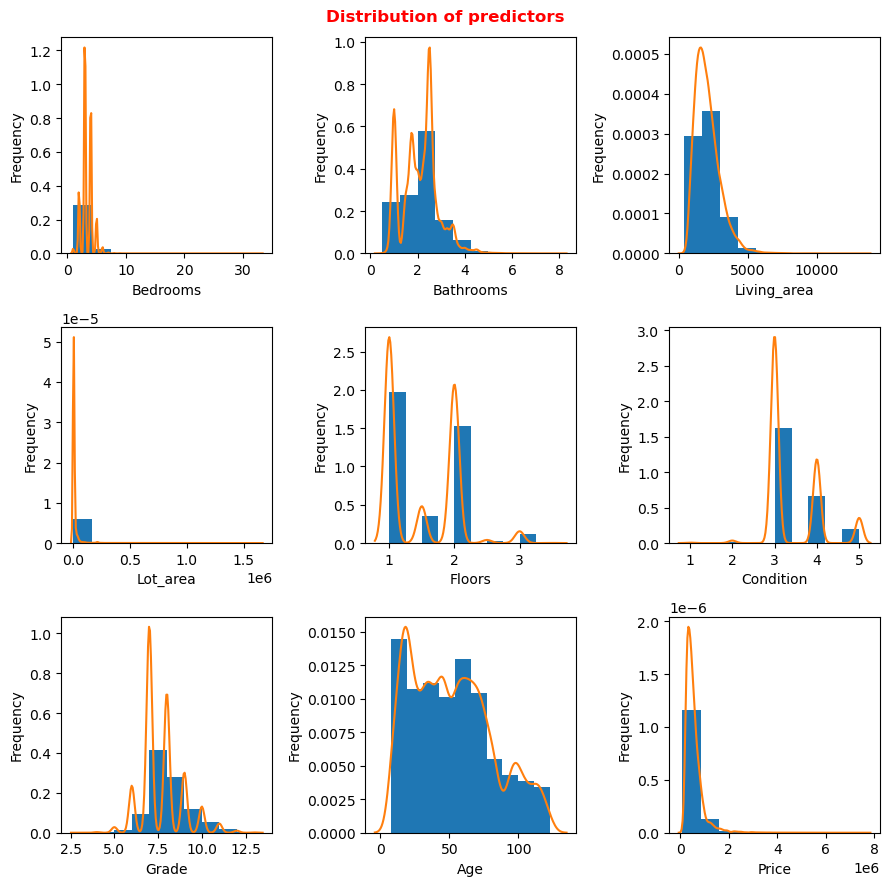

In [8]:
#Checking distribution of predictors with combined KDE and Histogram#
fig, (axs1, axs2, axs3) = plt.subplots(figsize=(9,9), nrows=3, ncols=3)
ax1,ax2,ax3 = axs1
ax4,ax5,ax6 = axs2
ax7,ax8,ax9 = axs3

y=df1.Price
x1=df1.Bedrooms
x2=df1.Bathrooms
x3=df1.Living_area
x4=df1.Lot_area
x5=df1.Floors
x6=df1.Condition
x7=df1.Grade
x8=df1.Age

x1.plot.hist(ax=ax1, density=True)
sns.kdeplot(ax=ax1,data=x1)
x2.plot.hist(ax=ax2, density=True)
sns.kdeplot(ax=ax2,data=x2)
x3.plot.hist(ax=ax3, density=True)
sns.kdeplot(ax=ax3,data=x3)
x4.plot.hist(ax=ax4, density=True)
sns.kdeplot(ax=ax4,data=x4)
x5.plot.hist(ax=ax5, density=True)             
sns.kdeplot(ax=ax5,data=x5)
x6.plot.hist(ax=ax6, density=True)             
sns.kdeplot(ax=ax6,data=x6)
x7.plot.hist(ax=ax7, density=True)             
sns.kdeplot(ax=ax7,data=x7)
x8.plot.hist(ax=ax8, density=True)            
sns.kdeplot(ax=ax8,data=x8)
y.plot.hist(ax=ax9, density=True)
sns.kdeplot(ax=ax9,data=y)

plt.suptitle("Distribution of predictors", color='red', fontsize = 12, fontweight ="bold")
plt.tight_layout()
plt.savefig('Images/KDE_Hist_check_plot.png',dpi=300,bbox_inches='tight')
plt.show()

#### Linearity check
Use scatter plots to check the relationship between the dependent and the independent variables.

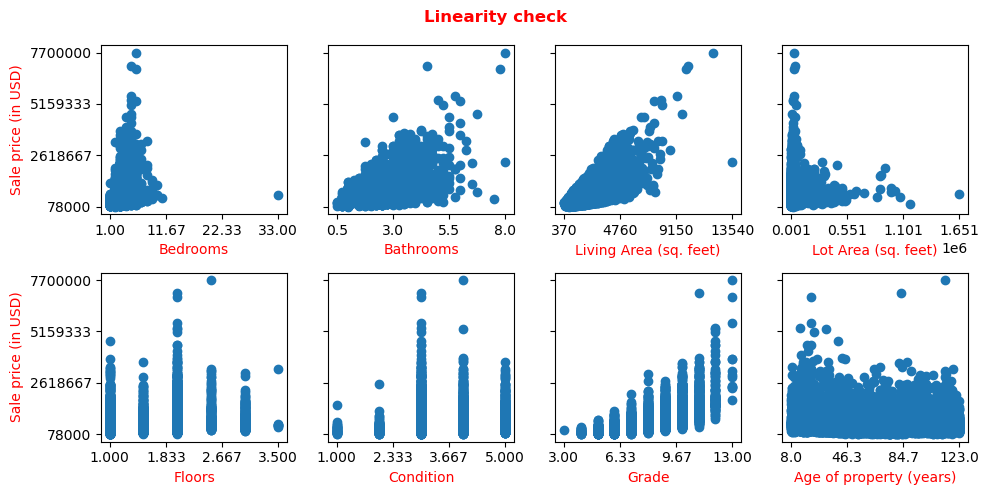

In [9]:
#Visualising linearity between independent and dependent variables#
fig, (axs1, axs2) = plt.subplots(figsize=(10,5), nrows= 2, ncols=4, sharey=True)
ax1,ax2,ax3,ax4 = axs1
ax5,ax6,ax7,ax8 = axs2

plt.ticklabel_format(style='plain')

ax1.scatter(x1,y)
ax1.set_xlabel('Bedrooms', c="r")
ax1.set_ylabel('Sale price (in USD)',c="r")
xticks1 = np.linspace(start=min(x1), stop=max(x1), num=4)
yticks1 = np.linspace(start=min(y), stop=max(y), num=4)
ax1.set_xticks(xticks1)
ax1.set_yticks(yticks1)

ax2.scatter(x2,y)
ax2.set_xlabel('Bathrooms', c="r")
xticks2 = np.linspace(start=min(x2), stop=max(x2), num=4)
yticks2 = np.linspace(start=min(y), stop=max(y), num=4)
ax2.set_xticks(xticks2)
ax2.set_yticks(yticks2)

ax3.scatter(x3,y)
ax3.set_xlabel('Living Area (sq. feet)', c="r")
xticks3 = np.linspace(start=min(x3), stop=max(x3), num=4)
yticks3 = np.linspace(start=min(y), stop=max(y), num=4)
ax3.set_xticks(xticks3)
ax3.set_yticks(yticks3)

ax4.scatter(x4,y)
ax4.set_xlabel('Lot Area (sq. feet)', c="r")
xticks4 = np.linspace(start=min(x4), stop=max(x4), num=4)
yticks4 = np.linspace(start=min(y), stop=max(y), num=4)
ax4.set_xticks(xticks4)
ax4.set_yticks(yticks4)

ax5.scatter(x5,y)
ax5.set_xlabel('Floors', c="r")
ax5.set_ylabel('Sale price (in USD)',c="r")
xticks5 = np.linspace(start=min(x5), stop=max(x5), num=4)
yticks5 = np.linspace(start=min(y), stop=max(y), num=4)
ax5.set_xticks(xticks5)
ax5.set_yticks(yticks5)

ax6.scatter(x6,y)
ax6.set_xlabel('Condition', c="r")
xticks6 = np.linspace(start=min(x6), stop=max(x6), num=4)
yticks6 = np.linspace(start=min(y), stop=max(y), num=4)
ax6.set_xticks(xticks6)
ax6.set_yticks(yticks6)

ax7.scatter(x7,y)
ax7.set_xlabel('Grade', c="r")
xticks7 = np.linspace(start=min(x7), stop=max(x7), num=4)
yticks7 = np.linspace(start=min(y), stop=max(y), num=4)
ax7.set_xticks(xticks7)
ax7.set_yticks(yticks7)

ax8.scatter(x8,y)
ax8.set_xlabel('Age of property (years)', c="r")
xticks8 = np.linspace(start=min(x8), stop=max(x8), num=4)
yticks8 = np.linspace(start=min(y), stop=max(y), num=4)
ax8.set_xticks(xticks8)
ax8.set_yticks(yticks8)

plt.suptitle("Linearity check", color='red', fontsize = 12, fontweight ="bold")
plt.tight_layout()
plt.savefig('Images/Linearity_check_Scatter_plot.png',dpi=300,bbox_inches='tight')
plt.show()

#### Create the Baseline model

In [10]:
#Baseline model
X1 = df1.drop('Price', axis=1)
y1 = df1['Price']
X1_int = sm.add_constant(X1)
model1 = sm.OLS(y1,X1_int).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     4363.
Date:                Sat, 15 Jul 2023   Prob (F-statistic):               0.00
Time:                        05:39:34   Log-Likelihood:            -2.9700e+05
No. Observations:               21597   AIC:                         5.940e+05
Df Residuals:                   21588   BIC:                         5.941e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.103e+06   1.82e+04    -60.519      0.000   -1.14e+06   -1.07e+06
Bedrooms    -4.915e+04   2123.053    -23.151      0.000   -5.33e+04    -4.5e+04
Bathrooms    5.286e+04   3587.694     14.734      0.000    4.58e+04    5.99e+04
Living_area   187.4021      3.421     54.784      0.000     180.697     194.107
Lot_area       -0.2459      0.038     -6.439      0.000      -0.321      -0.171
Floors       2.128e+04   3592.816      5.922      0.000    1.42e+04    2.83e+04
Condition    1.962e+04   2583.883      7.593      0.000    1.46e+04    2.47e+04
Grade        1.311e+05   2238.758     58.577      0.000    1.27e+05    1.36e+05
Age          4010.7386     69.171     57.983      0.000    3875.159    4146.318
==============================================================================
Omnibus:                    17302.265   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1207162.645
Skew:                           3.353   Prob(JB):                         0.00
Kurtosis:                      39.007   Cond. No.                     5.24e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.24e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Test assumptions of regression - Model 1
<p>
<div align="justify">
Check whether the model satisfies assumptions of homoskedasticity and normality. The assumption of linearity has already been visualised above.
    </div>

#### Skedasticity check

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


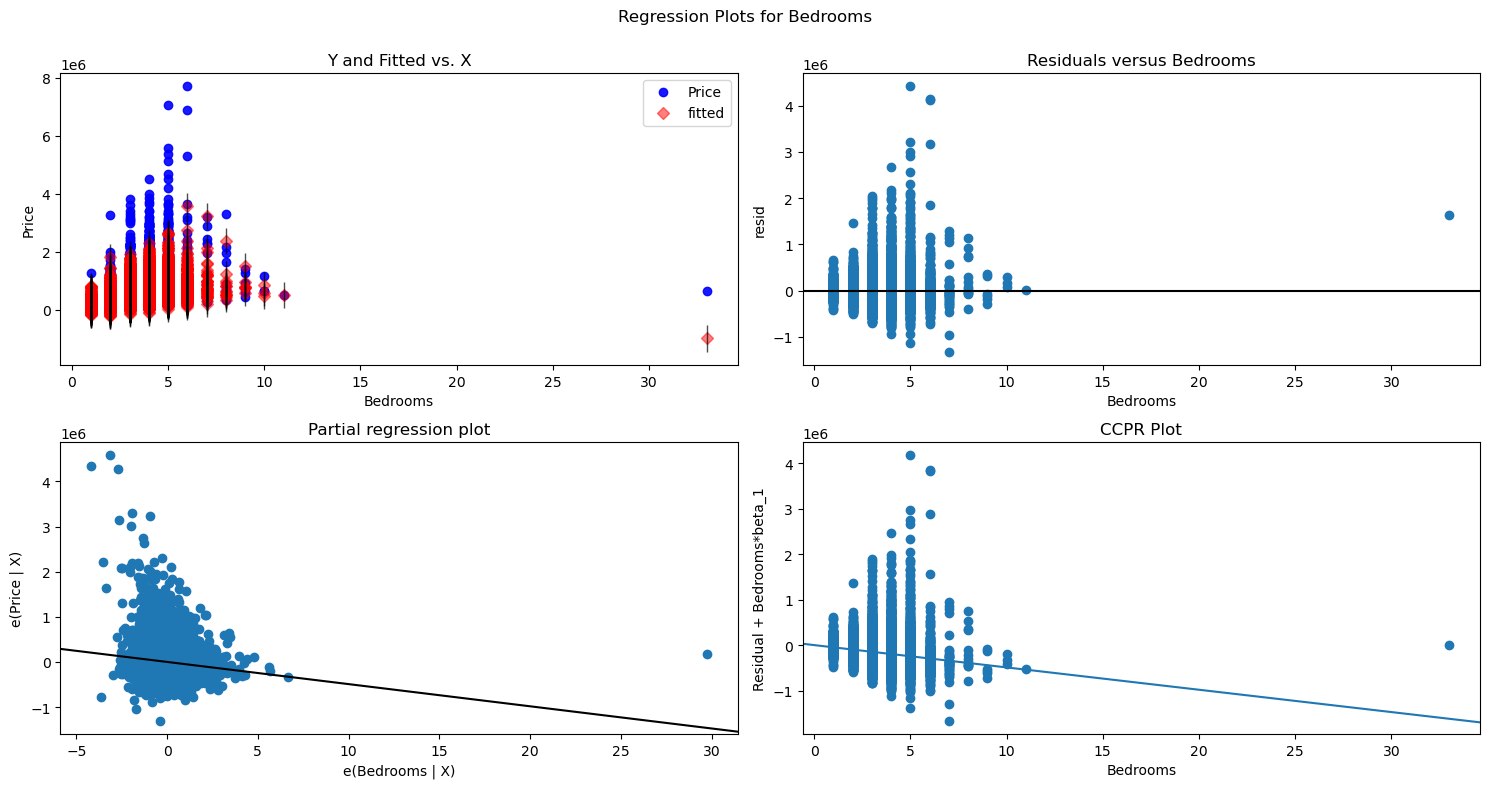

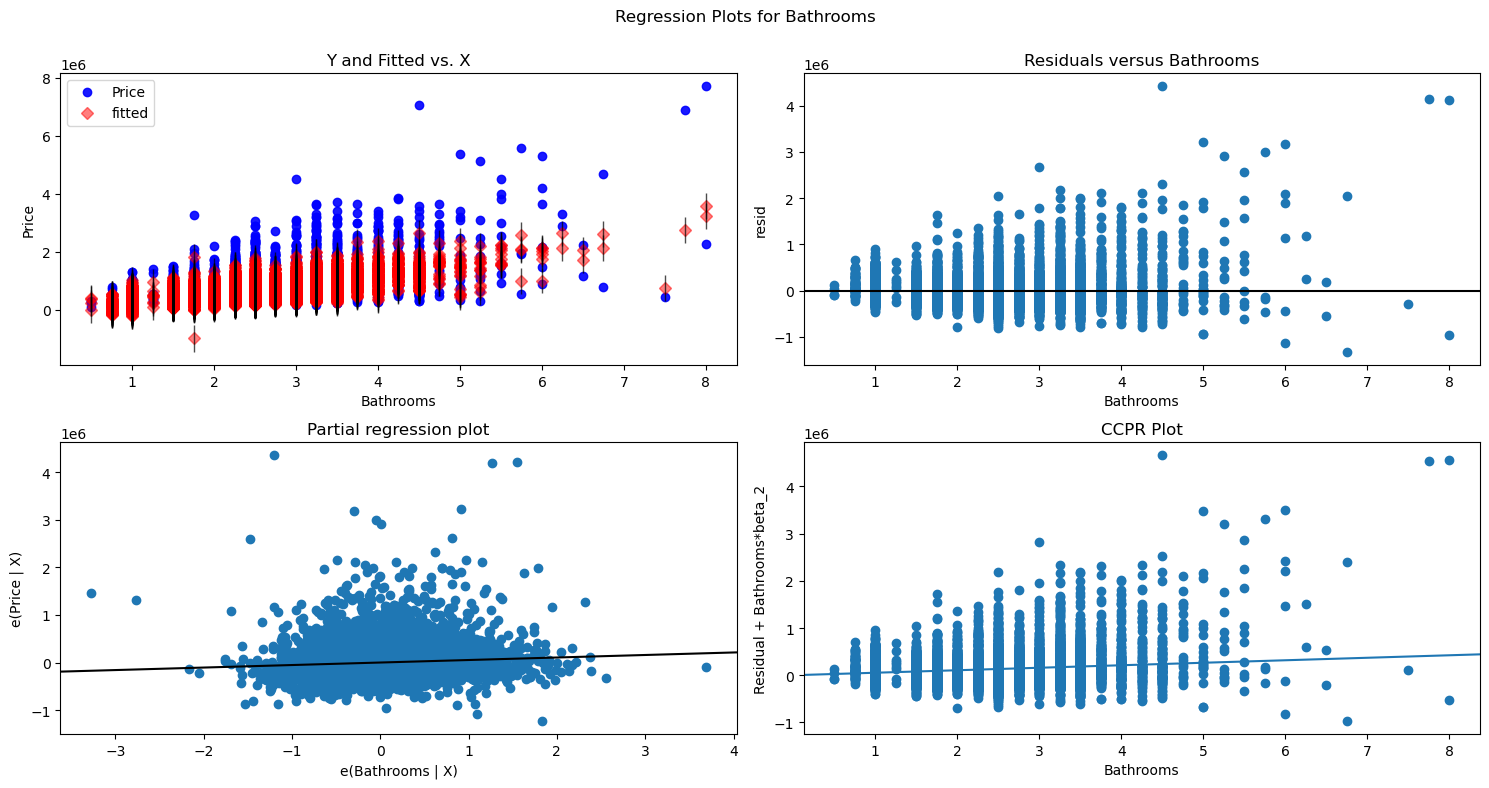

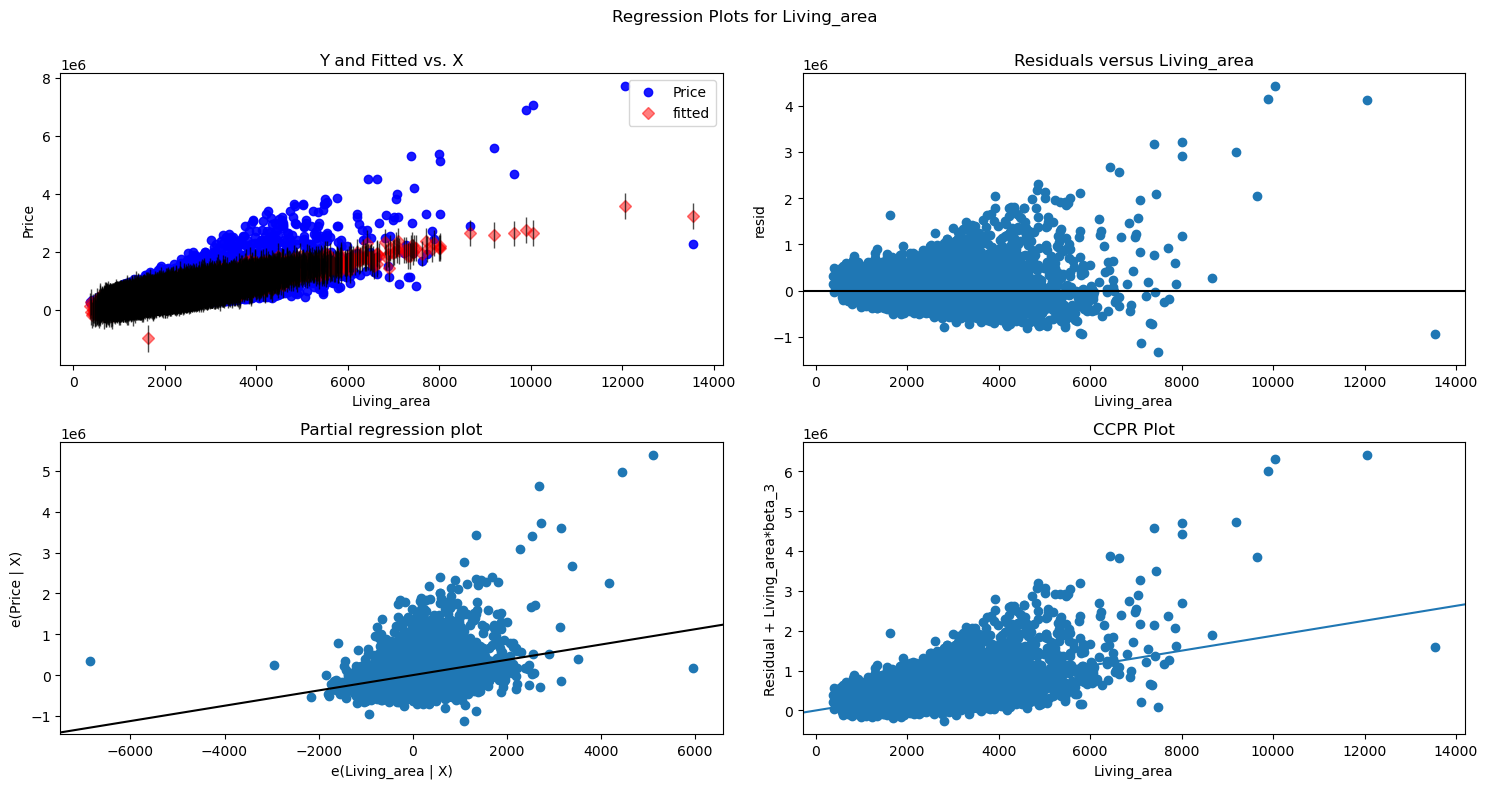

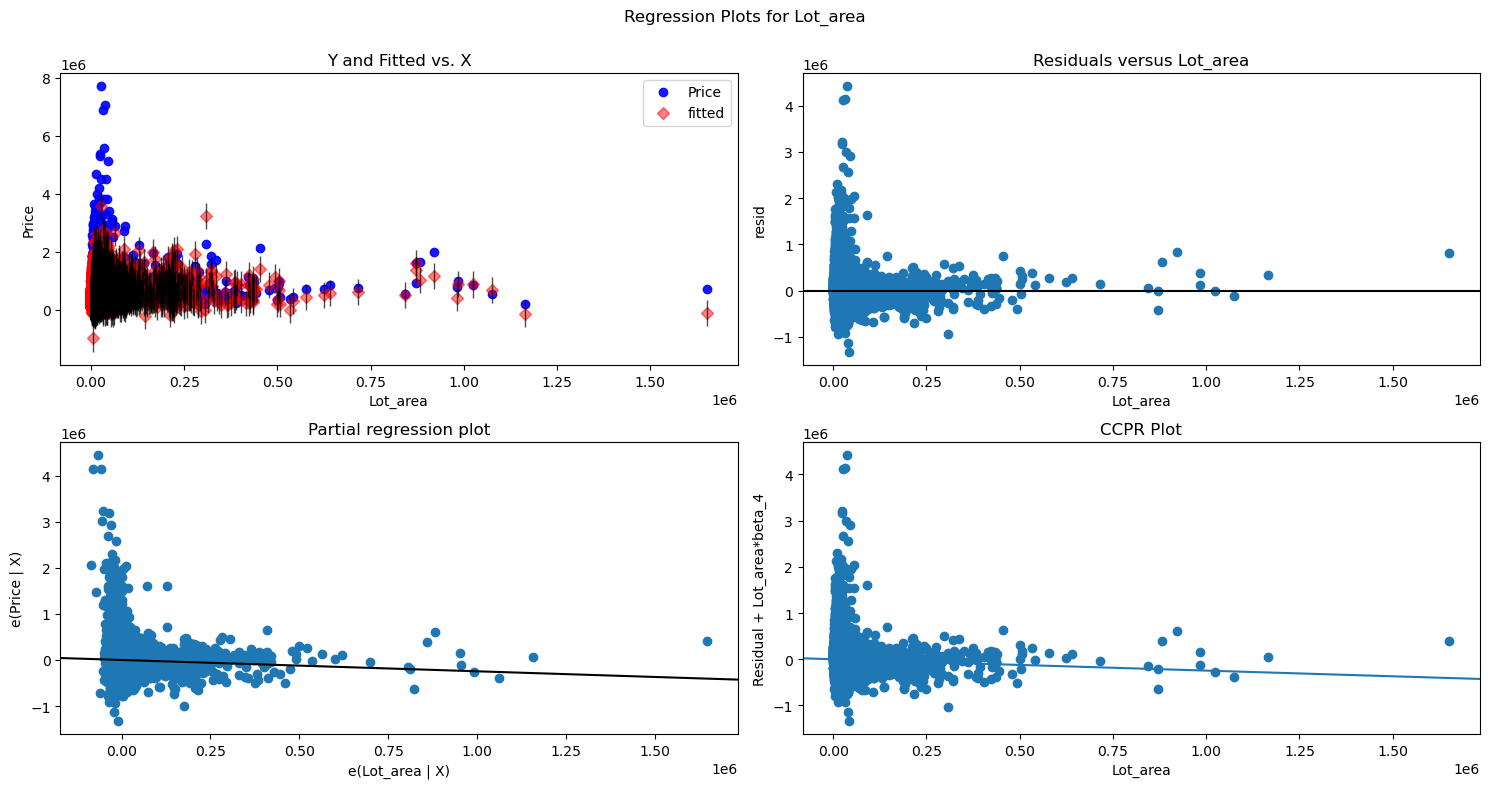

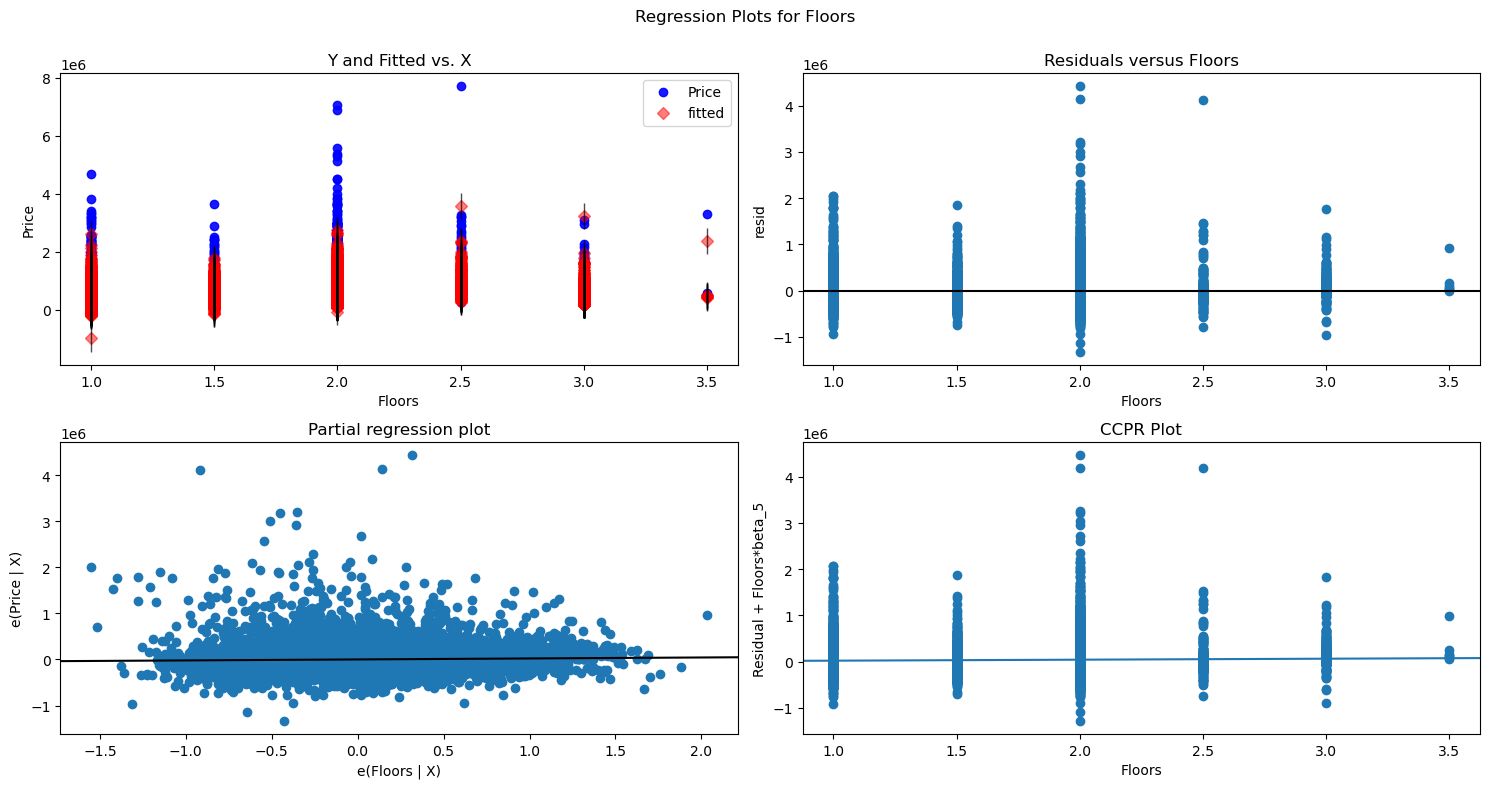

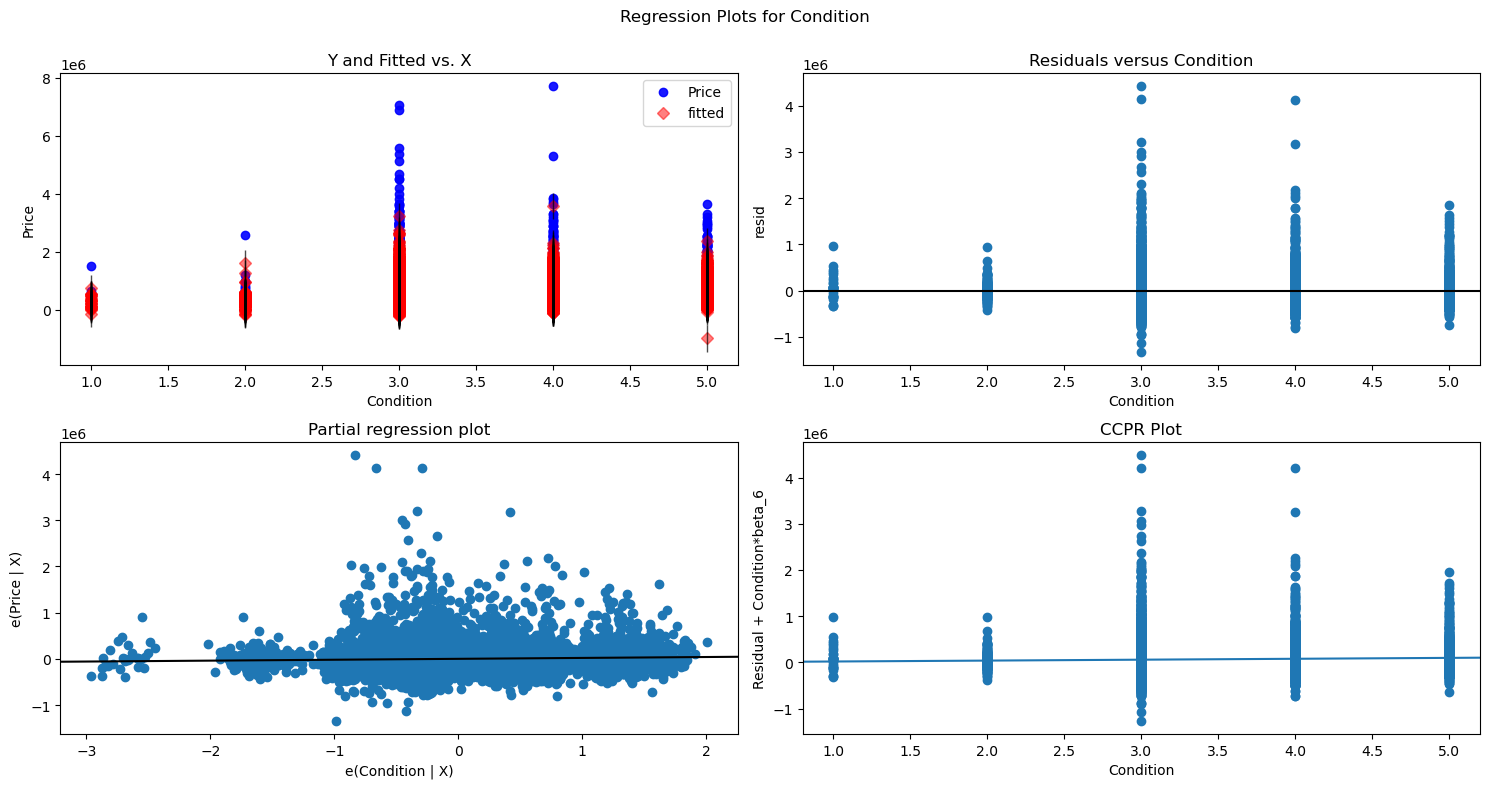

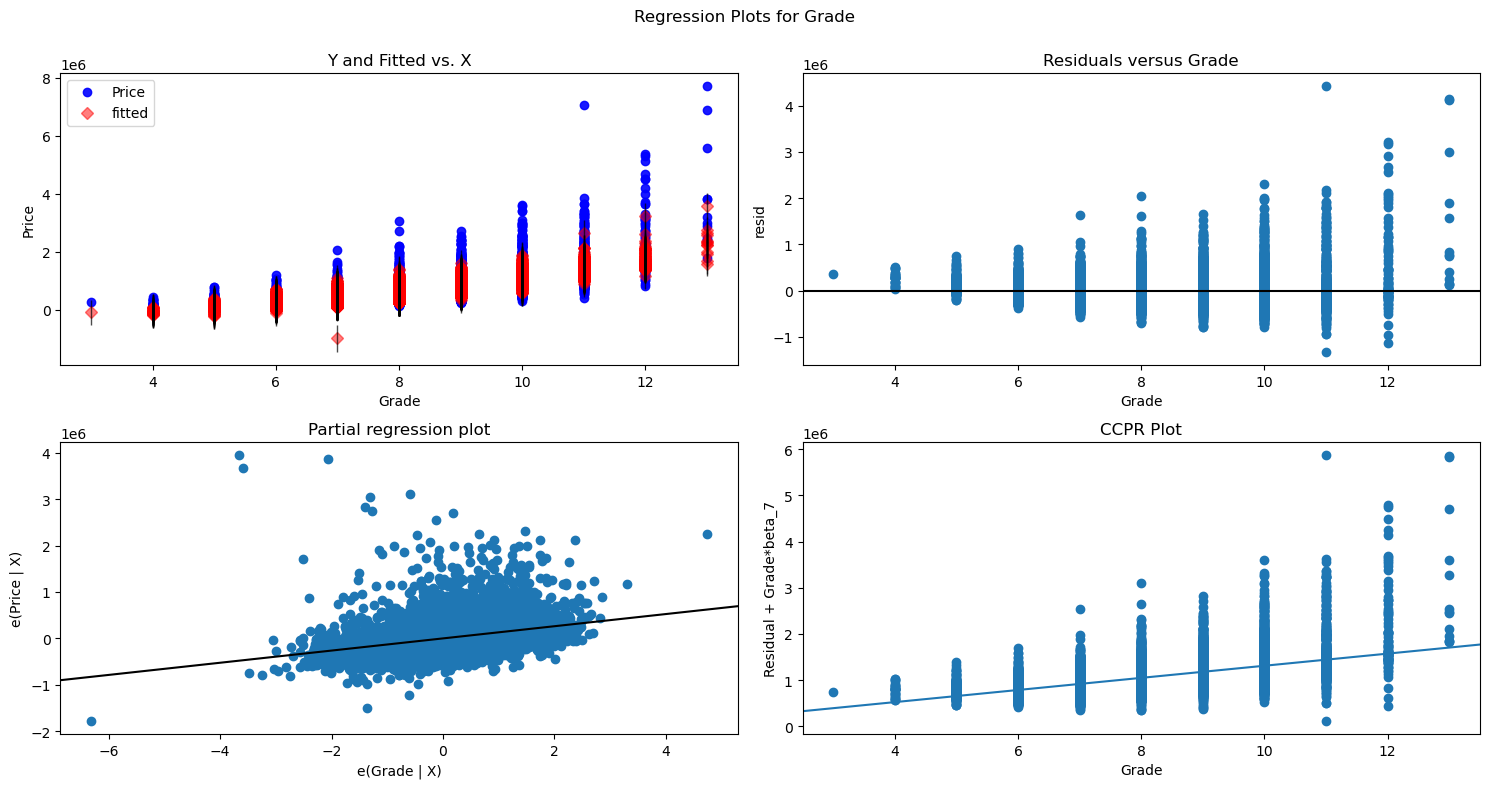

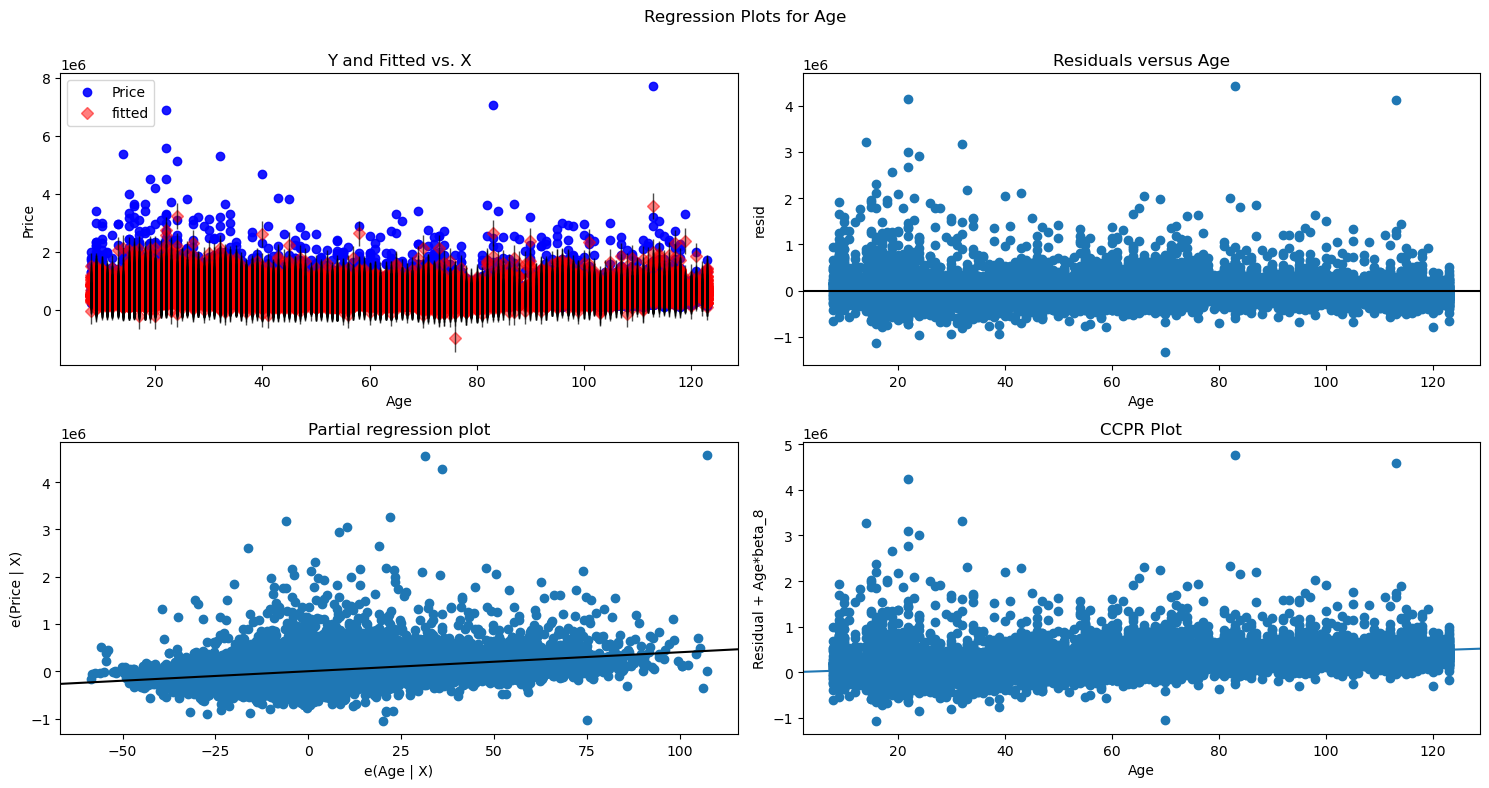

In [11]:
#Visualizing the error term for variance and skedasticity in baseline model#

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "Bedrooms",fig=fig)
plt.savefig('Images/Var_sked_Model1_Bedrooms.png',dpi=300,bbox_inches='tight')

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "Bathrooms",fig=fig)
plt.savefig('Images/Var_sked_Model1_Bathrooms.png',dpi=300,bbox_inches='tight')

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "Living_area",fig=fig)
plt.savefig('Images/Var_sked_Model1_Living_area.png',dpi=300,bbox_inches='tight')

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "Lot_area",fig=fig)
plt.savefig('Images/Var_sked_Model1_Lot_area.png',dpi=300,bbox_inches='tight')

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "Floors",fig=fig)
plt.savefig('Images/Var_sked_Model1_Floors.png',dpi=300,bbox_inches='tight')

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "Condition",fig=fig)
plt.savefig('Images/Var_sked_Model1_Condition.png',dpi=300,bbox_inches='tight')

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "Grade",fig=fig)
plt.savefig('Images/Var_sked_Model1_Grade.png',dpi=300,bbox_inches='tight')

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "Age",fig=fig)
plt.savefig('Images/Var_sked_Model1_Age.png',dpi=300,bbox_inches='tight')
plt.show()

#### Normality check

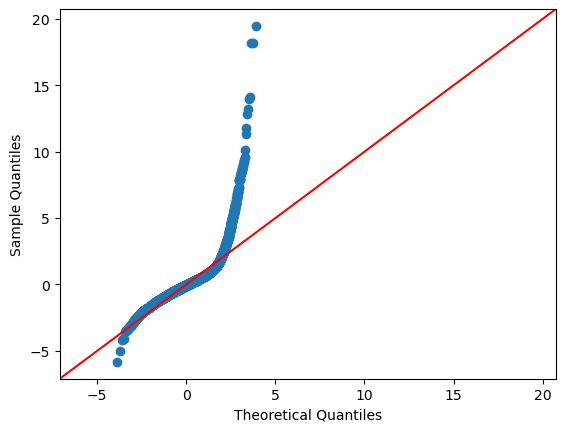

In [12]:
#Checking Normality assumption in baseline model by Q-Q plot#
residuals1 = model1.resid
fig = sm.graphics.qqplot(residuals1, dist=stats.norm, line='45', fit=True);
plt.savefig('Images/Model1_QQ_plot.png',dpi=300,bbox_inches='tight')
plt.show()

### Observations - Baseline model
<p>
    <div align="justify">
        
1. The adjusted R-squared value of 0.618, the high F-Statistic and the corresponding significant p-values appear to indicate some linear relationship between the chosen independent and dependent variables, however, this may be misleading in a baseline model.
     <br>
        </br>
2. There is a combination of continuous and categorical variables. It is safe to say that "Floors', 'Condition' and 'Grade' are categorical variables and need to be transformed accordingly. Further, during the next iteration, one needs to see if 'Bedrooms' and 'Bathrooms' will also need to be considered categorical variables.
    <br>
        </br>
3. With the exception of 'Age', the distribution of all continous variables appear to be heavily right-skewed, probably because of outliers (as can be seen from the scatter plots). Outliers will need to be eliminated.
    <br>
        </br>
4. It appears that the homoskedasticity and normality assumptions cannot be satisfied in this iteration, given the skew of the Q-Q plot and the high values for the JB test, kurtosis and skewness.
    </div>

### Step 3: Model 2 (Iteration 2)
<p>
<div align="justify">
Eliminate outliers, create dummy variables, check for multicollinearity, transform variables, render revised model and retest assumptions of regression in the new model.
    </div>

#### Removal of outliers

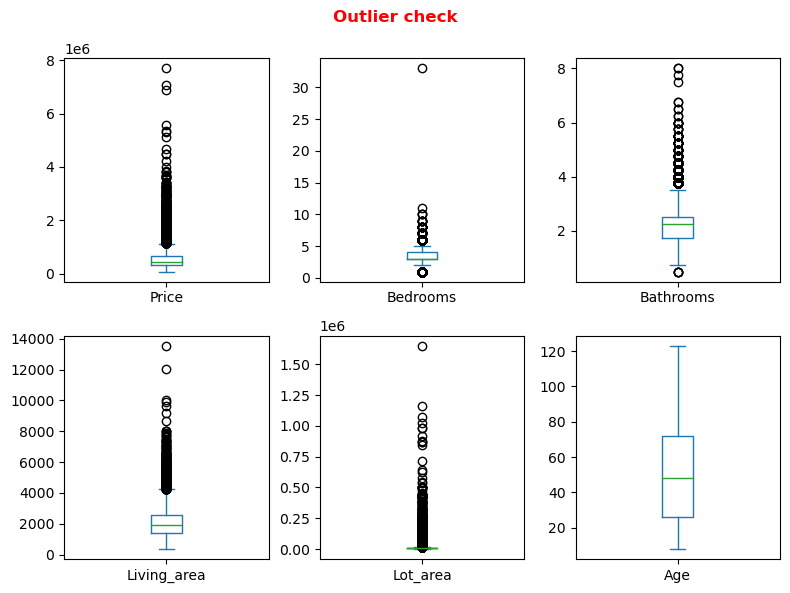

In [13]:
#Checking outlier values in continous variables with boxplots#

fig,(axs1, axs2)=plt.subplots(figsize=(8,6),nrows=2, ncols=3)
ax1,ax2,ax3=axs1
ax4,ax5,ax6=axs2

#Using variables assigned in Iteration 1 in df1#
y.plot.box(ax=ax1)
x1.plot.box(ax=ax2)
x2.plot.box(ax=ax3)
x3.plot.box(ax=ax4)
x4.plot.box(ax=ax5)
x8.plot.box(ax=ax6)

plt.suptitle("Outlier check", c="r", fontsize = 12, fontweight ="bold")
fig.tight_layout()
plt.savefig('Images/Outliers_check_boxplot.png',dpi=300,bbox_inches='tight')
plt.show()

<div align="justify">
From the above, it seems like the outlier in Bedrooms does not make sense, given its huge difference from the mean and a value of 33 (as observed from dataframe 1 and the Linearity check in Iteration 1). It might be possibly a typo during the original data entry. It might be advisable to compare that entry with 3-bedroom examples from the dataset and replace the 33 with a 3 if the entries seem similar, rather than include it in outlier removal. 
    </div>

In [14]:
#What if 33 bedrooms is a typo?#
#Comparing 9 or more bedroom properties to 3-bedroom properties#
display(df1.loc[df1['Bedrooms'] >= 9 ])
df3b=df1.loc[df1['Bedrooms']==3]
df3b.head()

,Price,Bedrooms,Bathrooms,Living_area,Lot_area,Floors,Condition,Grade,Age
4092,599999.0,9,4.50,3830,6988,2.5,3,7,85
4231,700000.0,9,3.00,3680,4400,2.0,3,7,115
6073,1280000.0,9,4.50,3650,5000,2.0,3,8,108
8537,450000.0,9,7.50,4050,6504,2.0,3,7,27
8748,520000.0,11,3.00,3000,4960,2.0,3,7,105
13301,1150000.0,10,5.25,4590,10920,1.0,3,9,15
15147,650000.0,10,2.00,3610,11914,2.0,4,7,65
15856,640000.0,33,1.75,1620,6000,1.0,5,7,76
16830,1400000.0,9,4.00,4620,5508,2.5,3,11,108
18428,934000.0,9,3.00,2820,4480,2.0,3,7,105


,Price,Bedrooms,Bathrooms,Living_area,Lot_area,Floors,Condition,Grade,Age
0,221900.0,3,1.00,1180,5650,1.0,3,7,68
1,538000.0,3,2.25,2570,7242,2.0,3,7,72
4,510000.0,3,2.00,1680,8080,1.0,3,8,36
6,257500.0,3,2.25,1715,6819,2.0,3,7,28
7,291850.0,3,1.50,1060,9711,1.0,3,7,60


<div align="justify">
Comparing the rows and columns, it definitely appears that 33 was probably meant to be 3. It is better to replace it before removing outliers from select independent variable columns. 
    </div>

In [15]:
#Replacing 33 bedrooms with 3 bedrooms in Row 15856 and confirming#
df1.at[15856,'Bedrooms']=3
df1.loc[15856,:]

Price          640000.00
Bedrooms            3.00
Bathrooms           1.75
Living_area      1620.00
Lot_area         6000.00
Floors              1.00
Condition           5.00
Grade               7.00
Age                76.00
Name: 15856, dtype: float64

In [16]:
#Removing outliers with IQR and creating new dataframe for iteration 2#
print('DF shape with outliers',  df1.shape)
     
cols = ['Price', 'Bedrooms','Bathrooms','Living_area', 'Lot_area','Age']

Q1 = df1[cols].quantile(0.25)
Q3 = df1[cols].quantile(0.75)
IQR = Q3 - Q1

df2 = df1[~((df1[cols] < (Q1 - 1.5 * IQR)) |(df1[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
print('DF shape after removing outliers',  df2.shape)

DF shape with outliers (21597, 9)
DF shape after removing outliers (17703, 9)


In [17]:
#Checking for NaN values in df2#
df2.isna().values.any()

False

In [18]:
df2.describe()

,Price,Bedrooms,Bathrooms,Living_area,Lot_area,Floors,Condition,Grade,Age
count,1.770300e+04,17703.000000,17703.000000,17703.000000,17703.000000,17703.000000,17703.000000,17703.000000,17703.000000
mean,4.630927e+05,3.285714,2.005380,1888.245326,7254.128905,1.472745,3.411060,7.464272,52.620008
std,2.003296e+05,0.784656,0.663119,684.156543,3533.840442,0.543061,0.647851,0.954008,29.687678
min,7.800000e+04,2.000000,0.750000,440.000000,520.000000,1.000000,1.000000,4.000000,8.000000
25%,3.087625e+05,3.000000,1.500000,1370.000000,4814.500000,1.000000,3.000000,7.000000,26.000000
50%,4.250000e+05,3.000000,2.000000,1790.000000,7200.000000,1.000000,3.000000,7.000000,51.000000
75%,5.800000e+05,4.000000,2.500000,2320.000000,9245.000000,2.000000,4.000000,8.000000,72.000000
max,1.120000e+06,5.000000,3.500000,4230.000000,19141.000000,3.500000,5.000000,11.000000,123.000000


#### Checking distribution after removing outliers

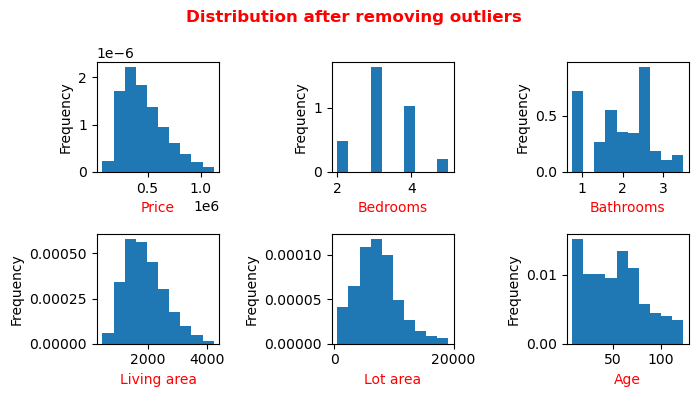

In [19]:
#Using histograms to check distribution of continuous variables#
fig, (axs1,axs2)=plt.subplots(figsize=(7,4), nrows=2,ncols=3)
ax1,ax2,ax3=axs1
ax4,ax5,ax6=axs2

y1=df2.Price
a1=df2.Bedrooms
a2=df2.Bathrooms
a3=df2.Living_area
a4=df2.Lot_area
a5=df2.Age

y1.plot.hist(ax=ax1,density=True)
a1.plot.hist(ax=ax2,density=True)
a2.plot.hist(ax=ax3,density=True)
a3.plot.hist(ax=ax4,density=True)
a4.plot.hist(ax=ax5,density=True)
a5.plot.hist(ax=ax6,density=True)

ax1.set_xlabel('Price',c='r')
ax2.set_xlabel('Bedrooms',c='r')
ax3.set_xlabel('Bathrooms',c='r')
ax4.set_xlabel('Living area',c='r')
ax5.set_xlabel('Lot area',c='r')
ax6.set_xlabel('Age',c='r')

plt.suptitle("Distribution after removing outliers", c="r", fontsize = 12, fontweight ="bold")
fig.tight_layout()
plt.savefig('Images/Dist_after_outlier_removal.png',dpi=300,bbox_inches='tight')
plt.show()

<div align="justify">
The distributions have improved and appear more normal than before. 'Bedrooms' and 'Bathrooms' are seen to be categorical variables, which will be dealt with in the next step.
    </div>

#### Dealing with categorical variables

In [20]:
#Converting categorical values into dummies using one-hot encoding#

Bed_dummies=pd.get_dummies(df2['Bedrooms'], prefix="Bed", drop_first=True)
Bath_dummies=pd.get_dummies(df2['Bathrooms'], prefix="Bath", drop_first=True)
Flr_dummies=pd.get_dummies(df2['Floors'], prefix="Flr", drop_first=True)
Cond_dummies=pd.get_dummies(df2['Condition'], prefix="Cond", drop_first=True)
Grd_dummies=pd.get_dummies(df2['Grade'], prefix="Grd", drop_first=True)

#Creating new dataframe with dummies included#
df2a=df2.drop(['Bedrooms','Bathrooms','Floors','Condition','Grade'],axis=1)
df2a=pd.concat([df2a,Bed_dummies,Bath_dummies,Flr_dummies,Cond_dummies,Grd_dummies],axis=1)
df2a.head()

,Price,Living_area,Lot_area,Age,Bed_3,Bed_4,Bed_5,Bath_1.0,Bath_1.25,Bath_1.5,...,Cond_3,Cond_4,Cond_5,Grd_5,Grd_6,Grd_7,Grd_8,Grd_9,Grd_10,Grd_11
0,221900.0,1180,5650,68,1,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
1,538000.0,2570,7242,72,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,180000.0,770,10000,90,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
3,604000.0,1960,5000,58,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,510000.0,1680,8080,36,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [21]:
 #Checking for null values in new dataframe#
df2a.isna().values.any()

False

<div align="justify">
It is worthwhile checking whether there are columns for dummy variables in each category that are not required and can be dropped in this iteration.
    </div>

In [22]:
#Checking how many columns for each categorical variable#
df2a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17703 entries, 0 to 21596
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Price        17703 non-null  float64
 1   Living_area  17703 non-null  int64  
 2   Lot_area     17703 non-null  int64  
 3   Age          17703 non-null  int64  
 4   Bed_3        17703 non-null  uint8  
 5   Bed_4        17703 non-null  uint8  
 6   Bed_5        17703 non-null  uint8  
 7   Bath_1.0     17703 non-null  uint8  
 8   Bath_1.25    17703 non-null  uint8  
 9   Bath_1.5     17703 non-null  uint8  
 10  Bath_1.75    17703 non-null  uint8  
 11  Bath_2.0     17703 non-null  uint8  
 12  Bath_2.25    17703 non-null  uint8  
 13  Bath_2.5     17703 non-null  uint8  
 14  Bath_2.75    17703 non-null  uint8  
 15  Bath_3.0     17703 non-null  uint8  
 16  Bath_3.25    17703 non-null  uint8  
 17  Bath_3.5     17703 non-null  uint8  
 18  Flr_1.5      17703 non-null  uint8  
 19  Flr_

   <div align="justify">
It appears that 'Bathrooms', which includes part bathrooms (up to two decimal places), as referred to by real estate policies can be reduced to fewer categories for simplicity. Here I choose to use only bathrooms that are either round numbers or have one decimal place.
    </div>             

In [23]:
#Dropping bathroom values that have two decimal places#

df2a.drop(columns=['Bath_1.25','Bath_1.75','Bath_2.25','Bath_2.75','Bath_3.25'],inplace=True)
df2a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17703 entries, 0 to 21596
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Price        17703 non-null  float64
 1   Living_area  17703 non-null  int64  
 2   Lot_area     17703 non-null  int64  
 3   Age          17703 non-null  int64  
 4   Bed_3        17703 non-null  uint8  
 5   Bed_4        17703 non-null  uint8  
 6   Bed_5        17703 non-null  uint8  
 7   Bath_1.0     17703 non-null  uint8  
 8   Bath_1.5     17703 non-null  uint8  
 9   Bath_2.0     17703 non-null  uint8  
 10  Bath_2.5     17703 non-null  uint8  
 11  Bath_3.0     17703 non-null  uint8  
 12  Bath_3.5     17703 non-null  uint8  
 13  Flr_1.5      17703 non-null  uint8  
 14  Flr_2.0      17703 non-null  uint8  
 15  Flr_2.5      17703 non-null  uint8  
 16  Flr_3.0      17703 non-null  uint8  
 17  Flr_3.5      17703 non-null  uint8  
 18  Cond_2       17703 non-null  uint8  
 19  Cond

#### Multicollinearity check
Check for multicollinearity and drop columns as required.

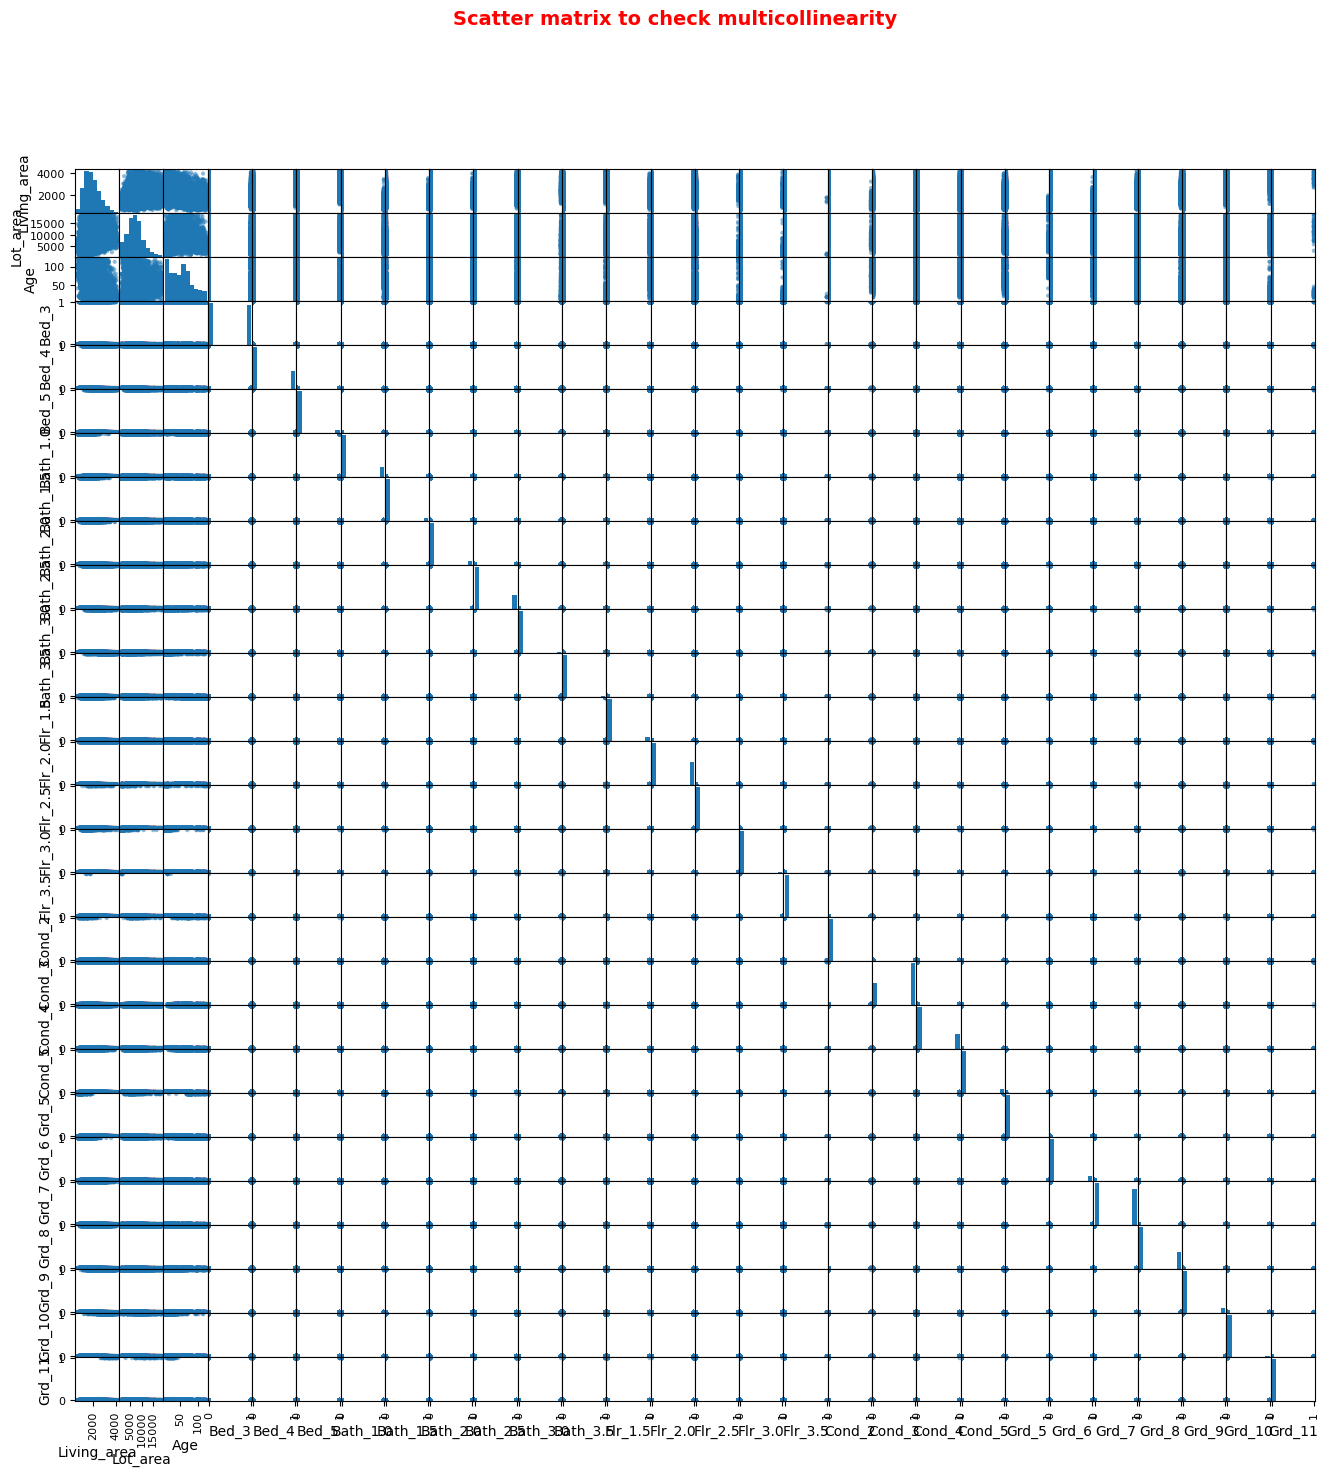

In [24]:
# Checking for multicollinearity with scatter matrix#

df2b=df2a.iloc[:,1:29]
pd.plotting.scatter_matrix(df2b,figsize = [16,16]);
plt.suptitle("Scatter matrix to check multicollinearity", c="r", fontsize = 14, fontweight ="bold")
plt.savefig('Images/Multicoll_scatter_matrix.png',dpi=300,bbox_inches='tight')
plt.show()

<div align ="justify">
Given the number or rows and columns, it might be easier to look at the correlation matrix and check for correlations greater than 0.75 before deciding to drop columns.
    </div>

In [25]:
#Creating correlation matrix#
df2b.corr()

,Living_area,Lot_area,Age,Bed_3,Bed_4,Bed_5,Bath_1.0,Bath_1.5,Bath_2.0,Bath_2.5,...,Cond_3,Cond_4,Cond_5,Grd_5,Grd_6,Grd_7,Grd_8,Grd_9,Grd_10,Grd_11
Living_area,1.000000,0.215505,-0.345624,-0.247141,0.436394,0.275944,-0.509368,-0.152603,-0.068765,0.333434,...,0.114809,-0.094269,-0.026627,-0.125982,-0.346750,-0.312802,0.209489,0.410467,0.298839,0.128160
Lot_area,0.215505,1.000000,0.053803,0.003462,0.114063,0.071864,-0.016423,-0.027118,-0.004507,-0.059338,...,-0.170669,0.178803,0.004272,0.001007,-0.001925,0.009257,-0.083061,0.037227,0.114599,0.077809
Age,-0.345624,0.053803,1.000000,-0.031694,-0.119716,-0.014458,0.433051,0.099866,0.110332,-0.446697,...,-0.397004,0.266910,0.242570,0.120155,0.316692,0.213590,-0.249348,-0.255004,-0.135097,-0.048318
Bed_3,-0.247141,0.003462,-0.031694,1.000000,-0.648652,-0.250201,-0.005220,0.051940,0.038159,-0.047387,...,-0.019668,0.030374,-0.013131,-0.038659,-0.033223,0.132106,-0.016772,-0.109832,-0.058371,-0.027907
Bed_4,0.436394,0.114063,-0.119716,-0.648652,1.000000,-0.170431,-0.236408,-0.078719,-0.020550,0.199931,...,0.023620,-0.032772,0.018006,-0.046873,-0.138448,-0.117945,0.082148,0.167733,0.095773,0.040901
Bed_5,0.275944,0.071864,-0.014458,-0.250201,-0.170431,1.000000,-0.104525,-0.032425,-0.003344,-0.029443,...,-0.009162,0.008262,0.009202,-0.015201,-0.059202,-0.025358,0.020624,0.062334,0.020447,0.012115
Bath_1.0,-0.509368,-0.016423,0.433051,-0.005220,-0.236408,-0.104525,1.000000,-0.140384,-0.162545,-0.290595,...,-0.090222,0.082258,0.000064,0.141948,0.425765,0.095970,-0.278249,-0.164711,-0.080607,-0.026877
Bath_1.5,-0.152603,-0.027118,0.099866,0.051940,-0.078719,-0.032425,-0.140384,1.000000,-0.093062,-0.166374,...,-0.043921,0.051253,-0.004167,-0.011948,-0.006551,0.128068,-0.060988,-0.082141,-0.044792,-0.015388
Bath_2.0,-0.068765,-0.004507,0.110332,0.038159,-0.020550,-0.003344,-0.162545,-0.093062,1.000000,-0.192639,...,-0.075268,0.023741,0.093720,-0.002269,-0.002192,0.104625,-0.046758,-0.070465,-0.047425,-0.017817
Bath_2.5,0.333434,-0.059338,-0.446697,-0.047387,0.199931,-0.029443,-0.290595,-0.166374,-0.192639,1.000000,...,0.229724,-0.181344,-0.098218,-0.055753,-0.191263,-0.208869,0.202135,0.201049,0.083992,0.027927


In [26]:
#Checking for correlations that are greater than 0.75 in the correlation matrix#
abs(df2b.corr()) > 0.75

,Living_area,Lot_area,Age,Bed_3,Bed_4,Bed_5,Bath_1.0,Bath_1.5,Bath_2.0,Bath_2.5,...,Cond_3,Cond_4,Cond_5,Grd_5,Grd_6,Grd_7,Grd_8,Grd_9,Grd_10,Grd_11
Living_area,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Lot_area,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Age,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Bed_3,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Bed_4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Bed_5,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Bath_1.0,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Bath_1.5,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
Bath_2.0,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
Bath_2.5,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [27]:
# Return any highly correlated pairs that are present in a new dataframe#

df2c=df2b.corr().abs().stack().reset_index().sort_values(0, ascending=False)
df2c['Pairs'] = list(zip(df2c.level_0, df2c.level_1))
df2c.set_index(['Pairs'], inplace = True)
df2c.drop(columns=['level_1', 'level_0'], inplace = True)
df2c.columns = ['Corr']
df2c[(df2c.Corr>.75) & (df2c.Corr <1)]

,Corr
Pairs,
"(Cond_3, Cond_4)",0.813823
"(Cond_4, Cond_3)",0.813823


<div align="justify">
Here I choose to remove both highly correlated columns (Condition 3 and Condition 4) so as to further reduce the number of categorical variables in future analyses.
    </div>

In [28]:
#Creating a new dataframe after dropping the highly correlated columns#

df2d=df2a.drop(columns=['Cond_3','Cond_4'], axis=1)
df2d.head()

,Price,Living_area,Lot_area,Age,Bed_3,Bed_4,Bed_5,Bath_1.0,Bath_1.5,Bath_2.0,...,Flr_3.5,Cond_2,Cond_5,Grd_5,Grd_6,Grd_7,Grd_8,Grd_9,Grd_10,Grd_11
0,221900.0,1180,5650,68,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,538000.0,2570,7242,72,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,180000.0,770,10000,90,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,604000.0,1960,5000,58,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,510000.0,1680,8080,36,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [29]:
df2d.isna().values.any()

False

In [30]:
df2d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17703 entries, 0 to 21596
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Price        17703 non-null  float64
 1   Living_area  17703 non-null  int64  
 2   Lot_area     17703 non-null  int64  
 3   Age          17703 non-null  int64  
 4   Bed_3        17703 non-null  uint8  
 5   Bed_4        17703 non-null  uint8  
 6   Bed_5        17703 non-null  uint8  
 7   Bath_1.0     17703 non-null  uint8  
 8   Bath_1.5     17703 non-null  uint8  
 9   Bath_2.0     17703 non-null  uint8  
 10  Bath_2.5     17703 non-null  uint8  
 11  Bath_3.0     17703 non-null  uint8  
 12  Bath_3.5     17703 non-null  uint8  
 13  Flr_1.5      17703 non-null  uint8  
 14  Flr_2.0      17703 non-null  uint8  
 15  Flr_2.5      17703 non-null  uint8  
 16  Flr_3.0      17703 non-null  uint8  
 17  Flr_3.5      17703 non-null  uint8  
 18  Cond_2       17703 non-null  uint8  
 19  Cond

In [31]:
df2d.shape

(17703, 27)

#### Log transformation of independent variables

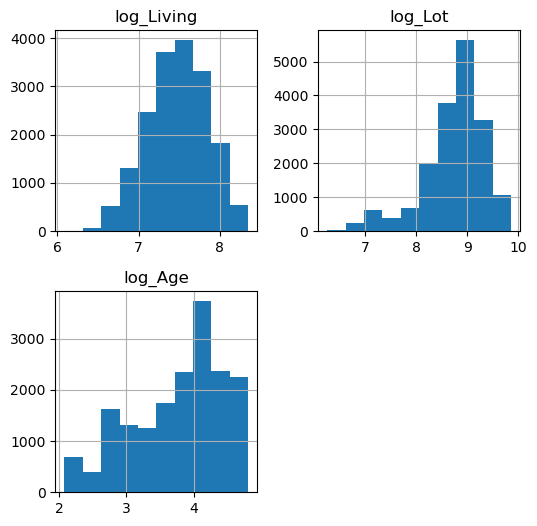

In [32]:
#Visualising log transformations of independent variables with histograms#

df2d_log=pd.DataFrame([])
df2d_log['log_Living'] = np.log(df2d['Living_area'])
df2d_log['log_Lot'] = np.log(df2d['Lot_area'])
df2d_log['log_Age'] = np.log(df2d['Age'])
df2d_log.hist(figsize  = [6, 6]);
plt.savefig('Images/Log_transform_hist.png',dpi=300,bbox_inches='tight')

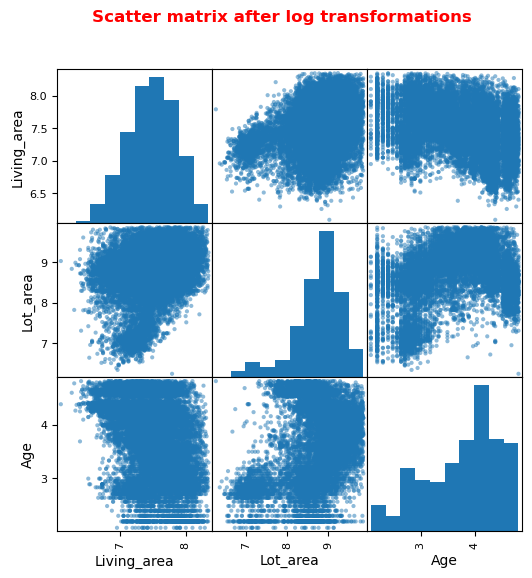

In [33]:
#Performing log transformation of independent variables within the dataframe#

var_log = ['Living_area', 'Lot_area','Age']
for feat in var_log:
    df2d[feat] = df2d[feat].map(lambda x: np.log(x))
pd.plotting.scatter_matrix(df2d[var_log], figsize=(6,6));
plt.suptitle("Scatter matrix after log transformations", c="r", fontsize = 12, fontweight ="bold")
plt.savefig('Images/Log_transform_scatter_matrix.png',dpi=300,bbox_inches='tight')
plt.show()

In [34]:
df2d.head()

,Price,Living_area,Lot_area,Age,Bed_3,Bed_4,Bed_5,Bath_1.0,Bath_1.5,Bath_2.0,...,Flr_3.5,Cond_2,Cond_5,Grd_5,Grd_6,Grd_7,Grd_8,Grd_9,Grd_10,Grd_11
0,221900.0,7.073270,8.639411,4.219508,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,538000.0,7.851661,8.887653,4.276666,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,180000.0,6.646391,9.210340,4.499810,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,604000.0,7.580700,8.517193,4.060443,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,510000.0,7.426549,8.997147,3.583519,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


#### Model 2

In [35]:
#Running a new model to see if there are any improvements#

X2 = df2d.drop('Price', axis=1)
y2 = df2d['Price']
X2_int = sm.add_constant(X2)
model2 = sm.OLS(y2,X2_int).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     793.5
Date:                Sat, 15 Jul 2023   Prob (F-statistic):               0.00
Time:                        05:44:59   Log-Likelihood:            -2.3439e+05
No. Observations:               17703   AIC:                         4.688e+05
Df Residuals:                   17676   BIC:                         4.690e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.272e+06   5.64e+04    -22.565      0.000   -1.38e+06   -1.16e+06
Living_area  2.428e+05   5363.035     45.279      0.000    2.32e+05    2.53e+05
Lot_area    -6.957e+04   2331.867    -29.836      0.000   -7.41e+04    -6.5e+04
Age          1.078e+05   2398.003     44.973      0.000    1.03e+05    1.13e+05
Bed_3       -4.237e+04   3519.801    -12.036      0.000   -4.93e+04   -3.55e+04
Bed_4       -5.042e+04   4272.505    -11.800      0.000   -5.88e+04    -4.2e+04
Bed_5       -4.962e+04   5924.508     -8.375      0.000   -6.12e+04    -3.8e+04
Bath_1.0      336.5176   3898.211      0.086      0.931   -7304.358    7977.393
Bath_1.5    -1.828e+04   4339.078     -4.212      0.000   -2.68e+04   -9770.599
Bath_2.0    -8286.3994   3820.978     -2.169      0.030   -1.58e+04    -796.908
Bath_2.5    -1.506e+04   3079.291     -4.892      0.000   -2.11e+04   -9027.381
Bath_3.0     2546.6310   6352.150      0.401      0.688   -9904.207     1.5e+04
Bath_3.5     5.455e+04   7321.492      7.450      0.000    4.02e+04    6.89e+04
Flr_1.5       2.16e+04   4045.951      5.339      0.000    1.37e+04    2.95e+04
Flr_2.0      2539.4420   3370.846      0.753      0.451   -4067.747    9146.631
Flr_2.5      2.277e+04   1.51e+04      1.509      0.131   -6801.002    5.23e+04
Flr_3.0       3.41e+04   7486.617      4.554      0.000    1.94e+04    4.88e+04
Flr_3.5      1.989e+04   5.59e+04      0.356      0.722   -8.96e+04    1.29e+05
Cond_2      -4.788e+04   1.26e+04     -3.814      0.000   -7.25e+04   -2.33e+04
Cond_5       4.297e+04   3948.579     10.883      0.000    3.52e+04    5.07e+04
Grd_5       -9308.5038   4.44e+04     -0.210      0.834   -9.64e+04    7.78e+04
Grd_6        2.691e+04   4.33e+04      0.621      0.534    -5.8e+04    1.12e+05
Grd_7        1.006e+05   4.33e+04      2.324      0.020    1.57e+04    1.85e+05
Grd_8        2.035e+05   4.34e+04      4.689      0.000    1.18e+05    2.89e+05
Grd_9        3.548e+05   4.36e+04      8.136      0.000    2.69e+05     4.4e+05
Grd_10       4.415e+05    4.4e+04     10.026      0.000    3.55e+05    5.28e+05
Grd_11       5.333e+05   4.76e+04     11.213      0.000     4.4e+05    6.26e+05
==============================================================================
Omnibus:                      879.812   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1262.180
Skew:                           0.461   Prob(JB):                    8.34e-275
Kurtosis:                       3.928   Cond. No.                     1.46e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+03. This might indicate that there are
strong multicollinearity or o

### Testing assumptions of regression - Model 2
<p>
    <div align="justify">
 Check whether Model 2 satisfies the assumptions of linearity, homoskedasticity and normality.
        </div>

#### Linearity check

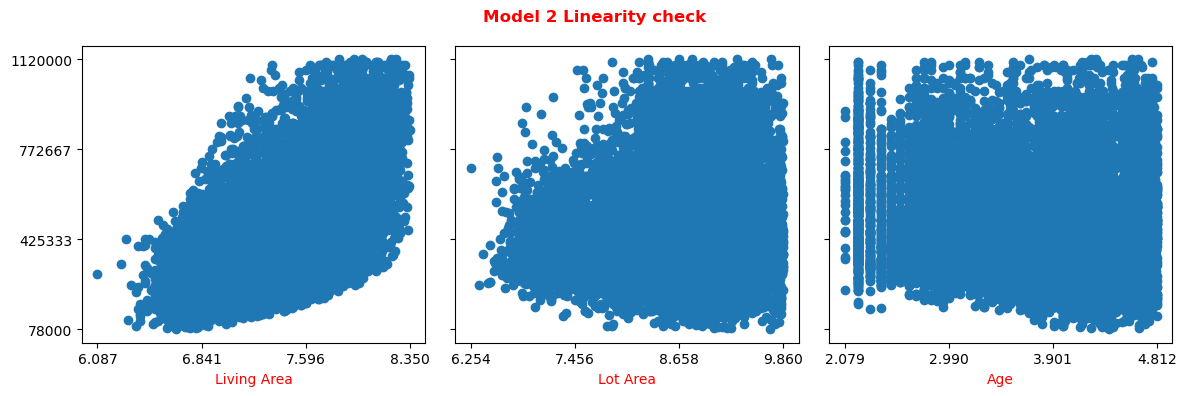

In [36]:
#Visualising linearity between independent and dependent variables in Model 2#

fig, (ax1, ax2,ax3) = plt.subplots(figsize=(12,4), nrows= 1, ncols=3, sharey=True)

y3=df2d.Price
b1=df2d.Living_area
b2=df2d.Lot_area
b3=df2d.Age

plt.ticklabel_format(style='plain')

ax1.scatter(b1,y3)
ax1.set_xlabel(('Living Area'), c="r")
xticks1 = np.linspace(start=min(b1), stop=max(b1), num=4)
yticks1 = np.linspace(start=min(y3), stop=max(y3), num=4)
ax1.set_xticks(xticks1)
ax1.set_yticks(yticks1)

ax2.scatter(b2,y3)
ax2.set_xlabel(('Lot Area'), c="r")
xticks2 = np.linspace(start=min(b2), stop=max(b2), num=4)
yticks2 = np.linspace(start=min(y3), stop=max(y3), num=4)
ax2.set_xticks(xticks2)
ax2.set_yticks(yticks2)

ax3.scatter(b3,y3)
ax3.set_xlabel(('Age'), c="r")
xticks3 = np.linspace(start=min(b3), stop=max(b3), num=4)
yticks3 = np.linspace(start=min(y3), stop=max(y3), num=4)
ax3.set_xticks(xticks3)
ax3.set_yticks(yticks3)

plt.suptitle("Model 2 Linearity check", c="r", fontsize = 12, fontweight ="bold")
plt.tight_layout()
plt.savefig('Images/Model2_Linearity_check_Scatter_plot.png',dpi=300,bbox_inches='tight')
plt.show()

#### Skedasticity check

eval_env: 1
eval_env: 1
eval_env: 1


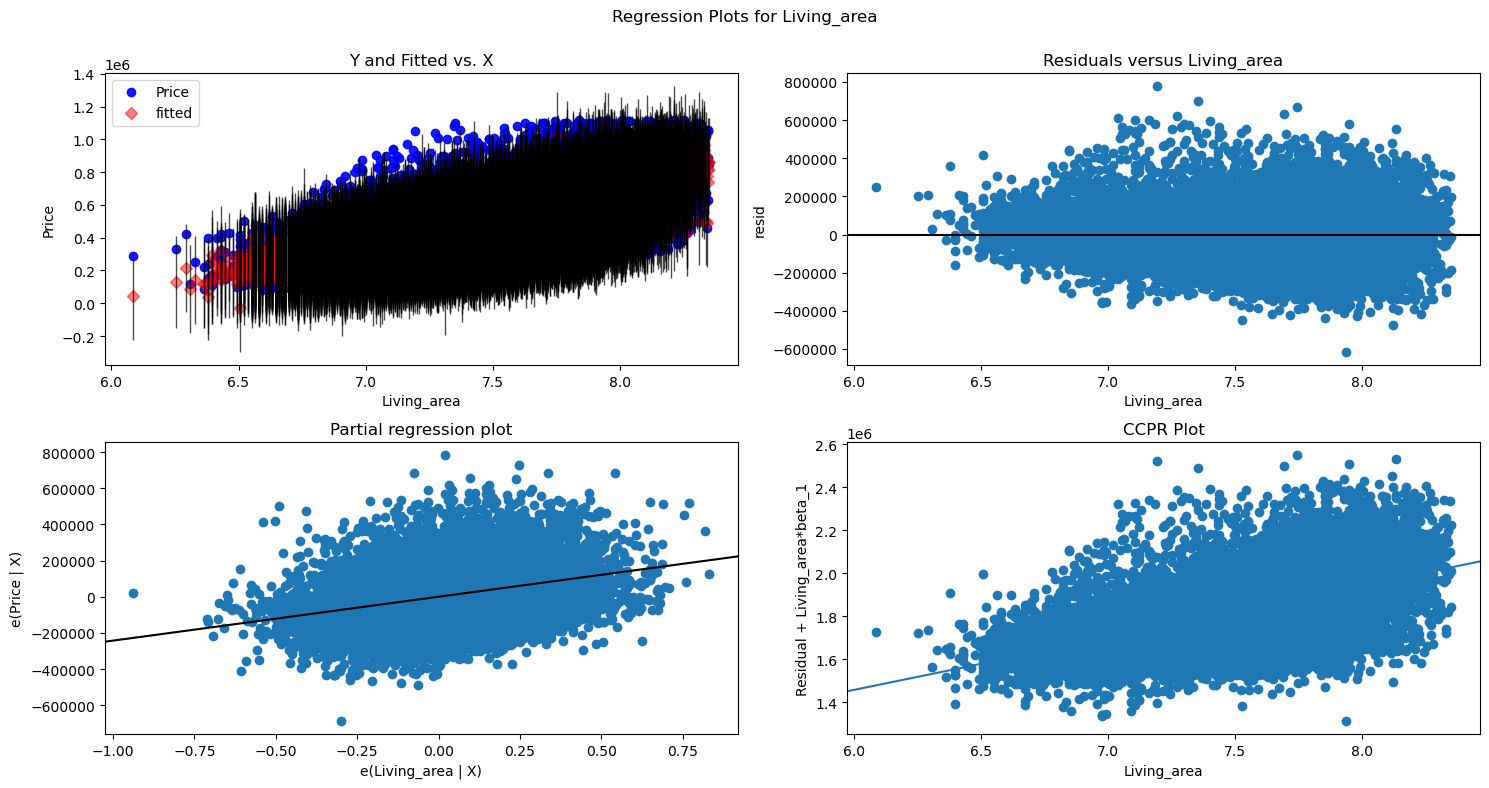

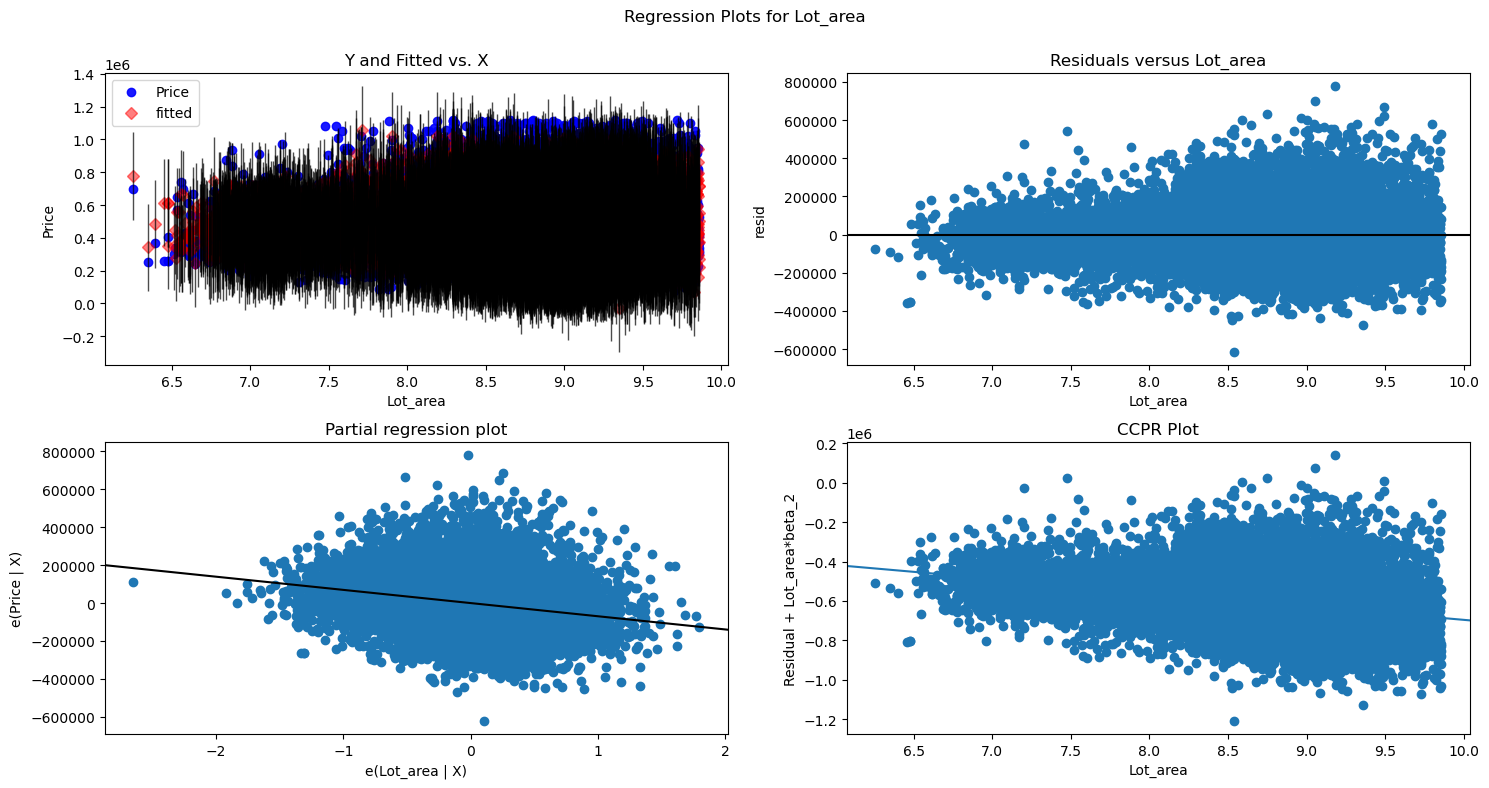

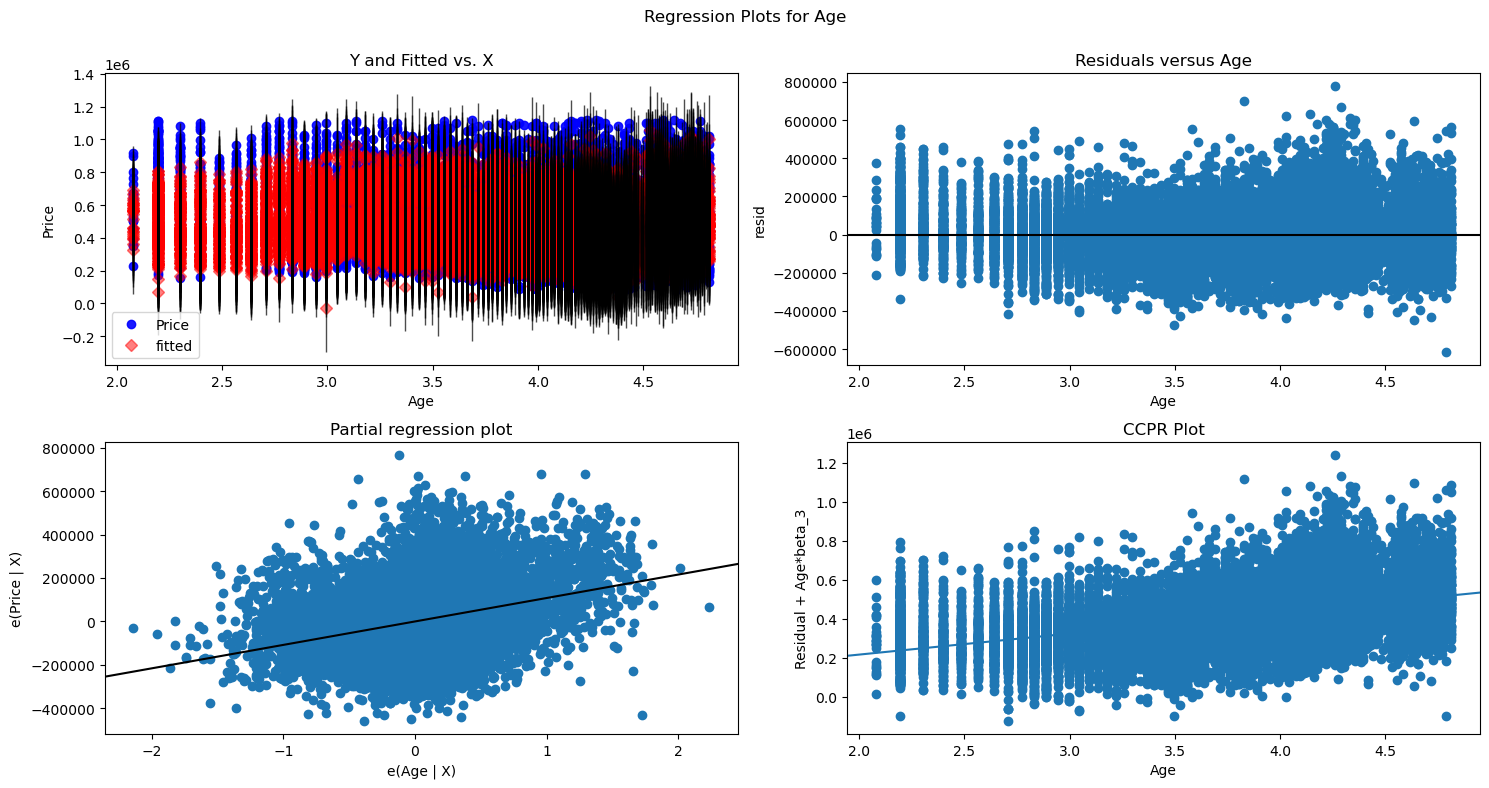

In [37]:
#Visualizing the error term for variance and skedasticity in Model 2#

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model2, "Living_area", fig=fig)
plt.savefig('Images/Var_sked_Model2_Living_area.png',dpi=300,bbox_inches='tight')

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model2, "Lot_area",fig=fig)
plt.savefig('Images/Var_sked_Model2_Lot_area.png',dpi=300,bbox_inches='tight')

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model2, "Age",fig=fig)
plt.savefig('Images/Var_sked_Model2_Age.png',dpi=300,bbox_inches='tight')

plt.show()

#### Normality check

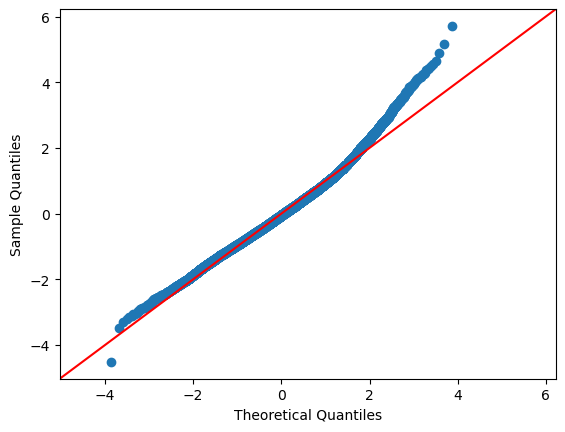

In [38]:
#Checking Normality assumption in Model 2 by Q-Q plot#

residuals2 = model2.resid
fig = sm.graphics.qqplot(residuals2, dist=stats.norm, line='45', fit=True);
plt.savefig('Images/Model2_QQ_plot.png',dpi=300,bbox_inches='tight')
plt.show()

### Observations: Model 2
<p>
    <div align = "justify">
        
1. The adjusted R-squared value has reduced, however there may still be linearity between our dependent and the three independent variables.
        <br>
        </br>
2. The skew and kurtosis values have reduced dramatically and are closer to values representing normal distribution.
<br>
</br>
3. There are a few categorical variables whose p-values indicate that they are not significant and can be eliminated in the next iteration.
<br>
</br>
4. 'Living area' appears to show some linearity with 'Price', but the linear relationship between 'Price' and 'Lot_area' and 'Age' is still not well-defined.
<br>
</br>
5. 'Living area' and 'Lot area' still show heteroskedasticity, whilst 'Age' appears to show homoskedasticity.
<br>
</br>
6. The normality plot has improved and shows a more linear relationship between Theoretical and Sample quantiles, indicating that further tweaking of the model might improve this feature.
    </div>          

### Step 4: Model 3 (Iteration 3) and Model 4 (Iteration 4)
<p>
   <div align="justify">
       
Eliminate non-significant variables, perform feature scaling, render revised model(s), choose the best model and retest assumptions of regression. 
<br>
       </br>
<b>Notes: </b>
<p>
   <div align = "justify">
        
For Model 3, I chose to remove columns of categorical variables that were shown (in Model 2) not to be significantly related to the dependent variable and included three from the 'Floors' category. The number of floors might also not generally factor in property purchase decisions (exceptions include but are not limited to people who are differently-abled or those looking for office space). Given that the dataset did not include or indicate those factors, I decided to remove the "Floors' set of variables and ran the model.
    <br>
</br>
For Model 4, I performed mean normalisation on the independent variables and ran a new model.
    </div>

In [39]:
#Removing columns that are not significantly related to the dependent variable and creating a new dataframe#

df2e=df2d.drop(columns=['Bath_1.0','Bath_3.0','Flr_1.5','Flr_2.0','Flr_2.5','Flr_3.0','Flr_3.5','Grd_5','Grd_6'],axis=1)
df2e.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17703 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Price        17703 non-null  float64
 1   Living_area  17703 non-null  float64
 2   Lot_area     17703 non-null  float64
 3   Age          17703 non-null  float64
 4   Bed_3        17703 non-null  uint8  
 5   Bed_4        17703 non-null  uint8  
 6   Bed_5        17703 non-null  uint8  
 7   Bath_1.5     17703 non-null  uint8  
 8   Bath_2.0     17703 non-null  uint8  
 9   Bath_2.5     17703 non-null  uint8  
 10  Bath_3.5     17703 non-null  uint8  
 11  Cond_2       17703 non-null  uint8  
 12  Cond_5       17703 non-null  uint8  
 13  Grd_7        17703 non-null  uint8  
 14  Grd_8        17703 non-null  uint8  
 15  Grd_9        17703 non-null  uint8  
 16  Grd_10       17703 non-null  uint8  
 17  Grd_11       17703 non-null  uint8  
dtypes: float64(4), uint8(14)
memory usage: 933.6 K

In [40]:
#Running a new model to test whether removal of columns changes results#
#Model 3#

X3 = df2e.drop('Price', axis=1)
y3 = df2e['Price']
X3_int = sm.add_constant(X3)
model3 = sm.OLS(y3,X3_int).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     1206.
Date:                Sat, 15 Jul 2023   Prob (F-statistic):               0.00
Time:                        05:45:23   Log-Likelihood:            -2.3442e+05
No. Observations:               17703   AIC:                         4.689e+05
Df Residuals:                   17685   BIC:                         4.690e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.209e+06   3.39e+04    -35.632      0.000   -1.28e+06   -1.14e+06
Living_area  2.451e+05   4859.312     50.442      0.000    2.36e+05    2.55e+05
Lot_area     -7.66e+04   2004.671    -38.212      0.000   -8.05e+04   -7.27e+04
Age          1.098e+05   2059.127     53.327      0.000    1.06e+05    1.14e+05
Bed_3       -3.898e+04   3456.235    -11.279      0.000   -4.58e+04   -3.22e+04
Bed_4       -4.662e+04   4210.764    -11.073      0.000   -5.49e+04   -3.84e+04
Bed_5       -4.551e+04   5867.379     -7.757      0.000    -5.7e+04    -3.4e+04
Bath_1.5    -1.758e+04   4045.778     -4.346      0.000   -2.55e+04   -9651.724
Bath_2.0    -8147.7104   3600.259     -2.263      0.024   -1.52e+04   -1090.849
Bath_2.5    -1.591e+04   2888.735     -5.507      0.000   -2.16e+04   -1.02e+04
Bath_3.5      5.32e+04   7240.209      7.347      0.000     3.9e+04    6.74e+04
Cond_2      -4.971e+04   1.26e+04     -3.957      0.000   -7.43e+04   -2.51e+04
Cond_5       4.313e+04   3938.708     10.951      0.000    3.54e+04    5.09e+04
Grd_7        7.563e+04   3811.218     19.844      0.000    6.82e+04    8.31e+04
Grd_8        1.797e+05   4595.740     39.093      0.000    1.71e+05    1.89e+05
Grd_9        3.312e+05   5900.052     56.136      0.000     3.2e+05    3.43e+05
Grd_10       4.189e+05   8353.619     50.140      0.000    4.02e+05    4.35e+05
Grd_11        5.12e+05   1.98e+04     25.905      0.000    4.73e+05    5.51e+05
==============================================================================
Omnibus:                      877.248   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1255.056
Skew:                           0.461   Prob(JB):                    2.94e-273
Kurtosis:                       3.923   Cond. No.                         414.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Feature scaling
Test whether feature scaling has any effect on modelling.

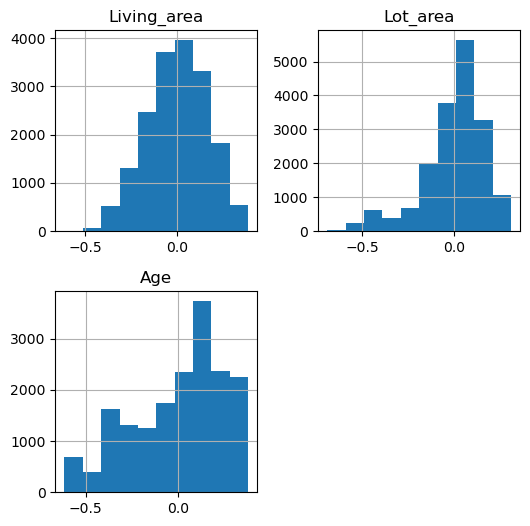

In [41]:
#Performing mean normalisation on lot Area, living Area and Age#

logLiving= df2d_log['log_Living'] 
logLot=df2d_log['log_Lot'] 
logAge=df2d_log['log_Age'] 

scaled_Living = (logLiving - np.mean(logLiving)) / (max(logLiving) - min(logLiving))
scaled_Lot = (logLot - np.mean(logLot)) / (max(logLot) - min(logLot))
scaled_Age = (logAge - np.mean(logAge)) / (max(logAge) - min(logAge))

df2d_cont_scaled = pd.DataFrame([])
df2d_cont_scaled['Living_area'] = scaled_Living
df2d_cont_scaled['Lot_area'] = scaled_Lot
df2d_cont_scaled['Age'] = scaled_Age

df2d_cont_scaled.hist(figsize = [6, 6]);
plt.savefig('Images/Model4_Feat_scaling_histplot.png',dpi=300,bbox_inches='tight')

In [42]:
#Creating a new dataframe#

df3=df2e.drop(columns=['Living_area','Lot_area','Age'], axis=1)
df3=pd.concat([df3,df2d_cont_scaled],axis=1)
df3.head()

,Price,Bed_3,Bed_4,Bed_5,Bath_1.5,Bath_2.0,Bath_2.5,Bath_3.5,Cond_2,Cond_5,Grd_7,Grd_8,Grd_9,Grd_10,Grd_11,Living_area,Lot_area,Age
0,221900.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,-0.178346,-0.028391,0.166499
1,538000.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0.165590,0.040455,0.187415
2,180000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.366965,0.129947,0.269071
3,604000.0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0.045865,-0.062286,0.108292
4,510000.0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,-0.022248,0.070821,-0.066230


In [43]:
#Checking effect by running Model 4#
#Model 4#

X4 = df3.drop('Price', axis=1)
y4 = df3['Price']
X4_int = sm.add_constant(X4)
model4 = sm.OLS(y4,X4_int).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     1206.
Date:                Sat, 15 Jul 2023   Prob (F-statistic):               0.00
Time:                        05:45:24   Log-Likelihood:            -2.3442e+05
No. Observations:               17703   AIC:                         4.689e+05
Df Residuals:                   17685   BIC:                         4.690e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.671e+05   4811.177     76.307      0.000    3.58e+05    3.77e+05
Bed_3       -3.898e+04   3456.235    -11.279      0.000   -4.58e+04   -3.22e+04
Bed_4       -4.662e+04   4210.764    -11.073      0.000   -5.49e+04   -3.84e+04
Bed_5       -4.551e+04   5867.379     -7.757      0.000    -5.7e+04    -3.4e+04
Bath_1.5    -1.758e+04   4045.778     -4.346      0.000   -2.55e+04   -9651.724
Bath_2.0    -8147.7104   3600.259     -2.263      0.024   -1.52e+04   -1090.849
Bath_2.5    -1.591e+04   2888.735     -5.507      0.000   -2.16e+04   -1.02e+04
Bath_3.5      5.32e+04   7240.209      7.347      0.000     3.9e+04    6.74e+04
Cond_2      -4.971e+04   1.26e+04     -3.957      0.000   -7.43e+04   -2.51e+04
Cond_5       4.313e+04   3938.708     10.951      0.000    3.54e+04    5.09e+04
Grd_7        7.563e+04   3811.218     19.844      0.000    6.82e+04    8.31e+04
Grd_8        1.797e+05   4595.740     39.093      0.000    1.71e+05    1.89e+05
Grd_9        3.312e+05   5900.052     56.136      0.000     3.2e+05    3.43e+05
Grd_10       4.189e+05   8353.619     50.140      0.000    4.02e+05    4.35e+05
Grd_11        5.12e+05   1.98e+04     25.905      0.000    4.73e+05    5.51e+05
Living_area  5.547e+05    1.1e+04     50.442      0.000    5.33e+05    5.76e+05
Lot_area    -2.762e+05   7228.360    -38.212      0.000    -2.9e+05   -2.62e+05
Age          3.001e+05   5627.064     53.327      0.000    2.89e+05    3.11e+05
==============================================================================
Omnibus:                      877.248   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1255.056
Skew:                           0.461   Prob(JB):                    2.94e-273
Kurtosis:                       3.923   Cond. No.                         26.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Testing assumptions of regression - Model 4
<p>
    <div align ="justify">
I chose to go with Model 4 for the next set of analyses ( see "Observations' below). Here I check whether Model 4 satisfies the assumptions of linearity, homoskedasticity and normality.
        </div>

#### Linearity check

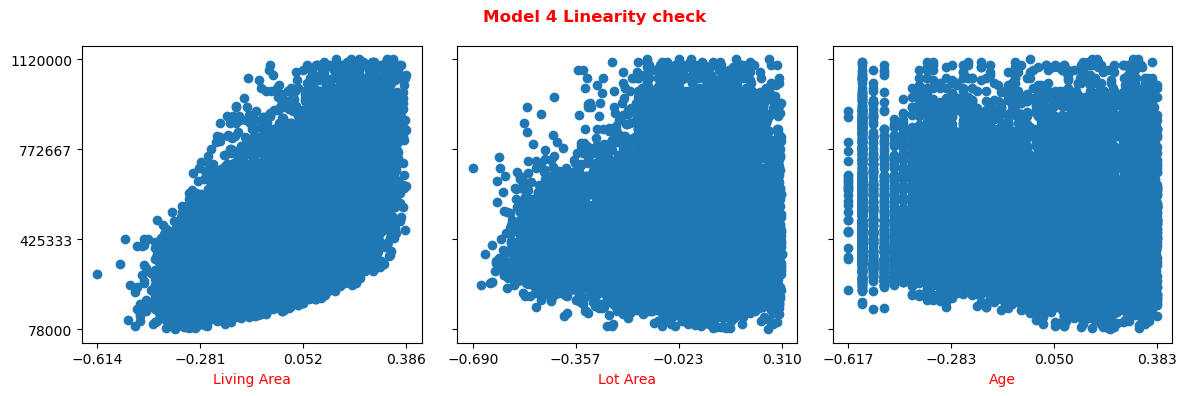

In [44]:
#Visualising linearity between independent and dependent variables in Model 4#

fig, (ax1, ax2,ax3) = plt.subplots(figsize=(12,4), nrows= 1, ncols=3, sharey=True)

y4=df3.Price
c1=df3.Living_area
c2=df3.Lot_area
c3=df3.Age

plt.ticklabel_format(style='plain')

ax1.scatter(c1,y4)
ax1.set_xlabel(('Living Area'), c="r")
xticks1 = np.linspace(start=min(c1), stop=max(c1), num=4)
yticks1 = np.linspace(start=min(y4), stop=max(y4), num=4)
ax1.set_xticks(xticks1)
ax1.set_yticks(yticks1)

ax2.scatter(c2,y4)
ax2.set_xlabel(('Lot Area'), c="r")
xticks2 = np.linspace(start=min(c2), stop=max(c2), num=4)
yticks2 = np.linspace(start=min(y4), stop=max(y4), num=4)
ax2.set_xticks(xticks2)
ax2.set_yticks(yticks2)

ax3.scatter(c3,y4)
ax3.set_xlabel(('Age'), c="r")
xticks3 = np.linspace(start=min(c3), stop=max(c3), num=4)
yticks3 = np.linspace(start=min(y4), stop=max(y4), num=4)
ax3.set_xticks(xticks3)
ax3.set_yticks(yticks3)

plt.suptitle("Model 4 Linearity check", c="r", fontsize = 12, fontweight ="bold")
plt.tight_layout()
plt.savefig('Images/Model4_Linearity_check_Scatter_plot.png',dpi=300,bbox_inches='tight')
plt.show()

#### Skedasticity check

eval_env: 1
eval_env: 1
eval_env: 1


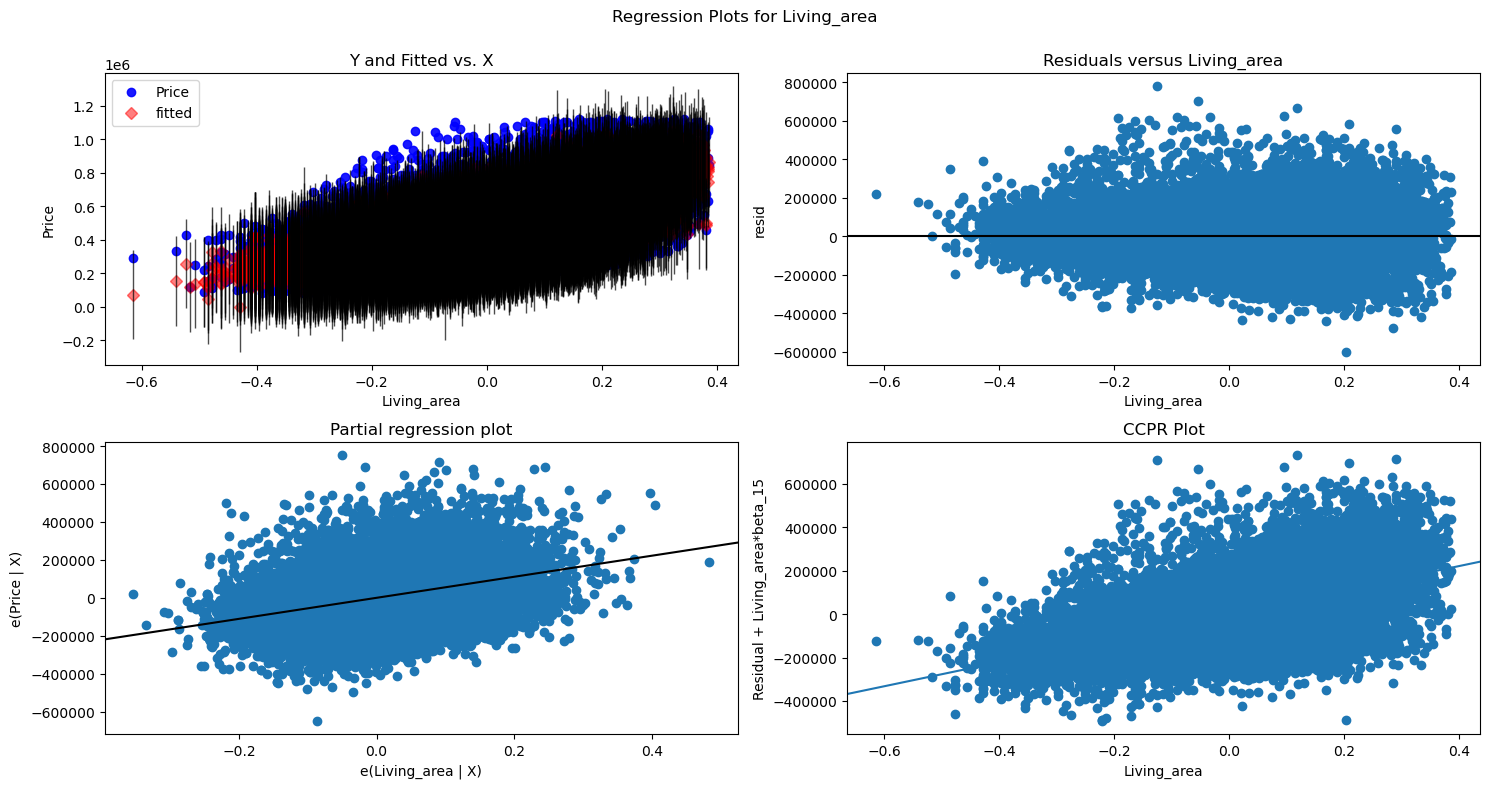

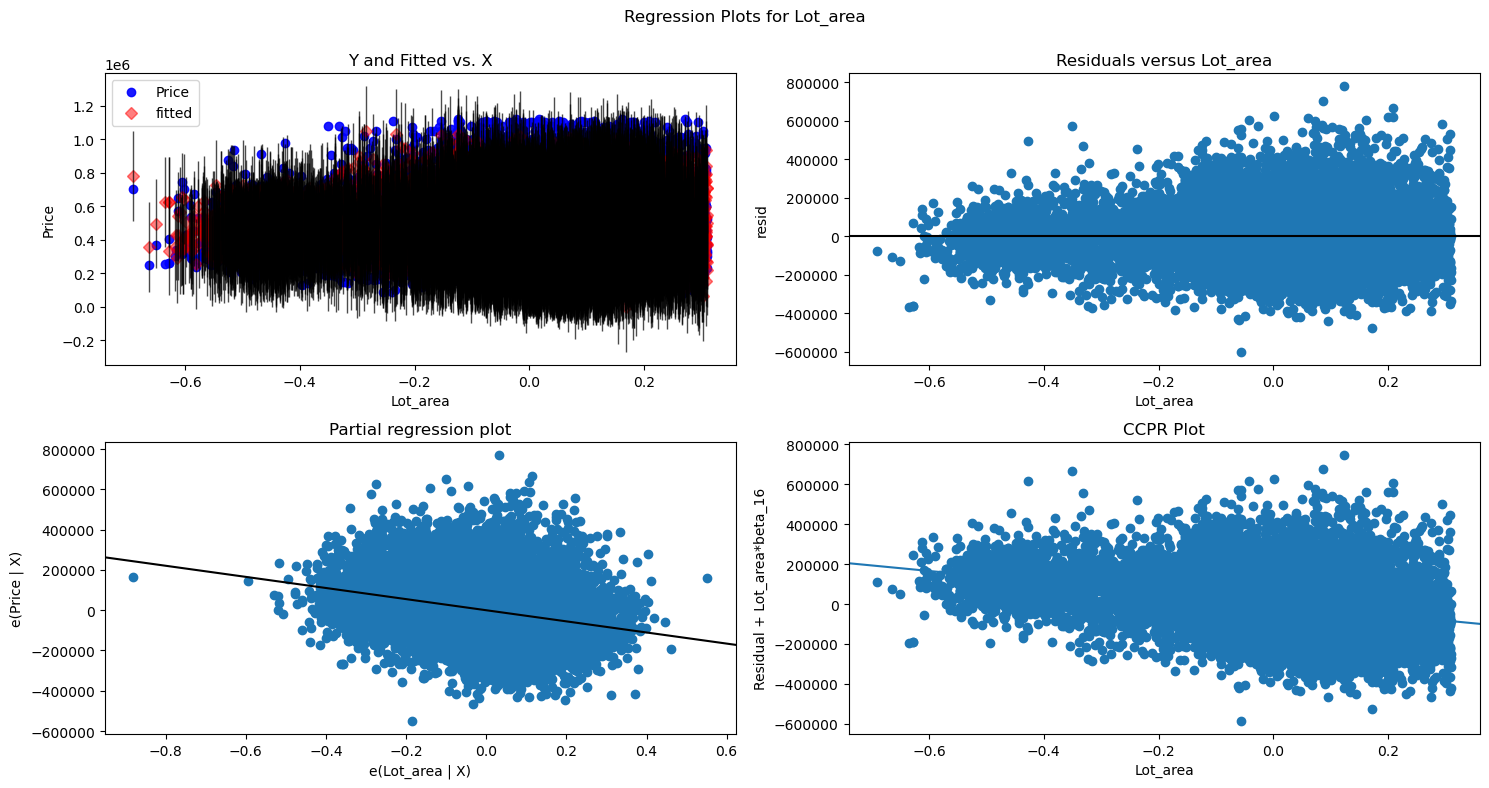

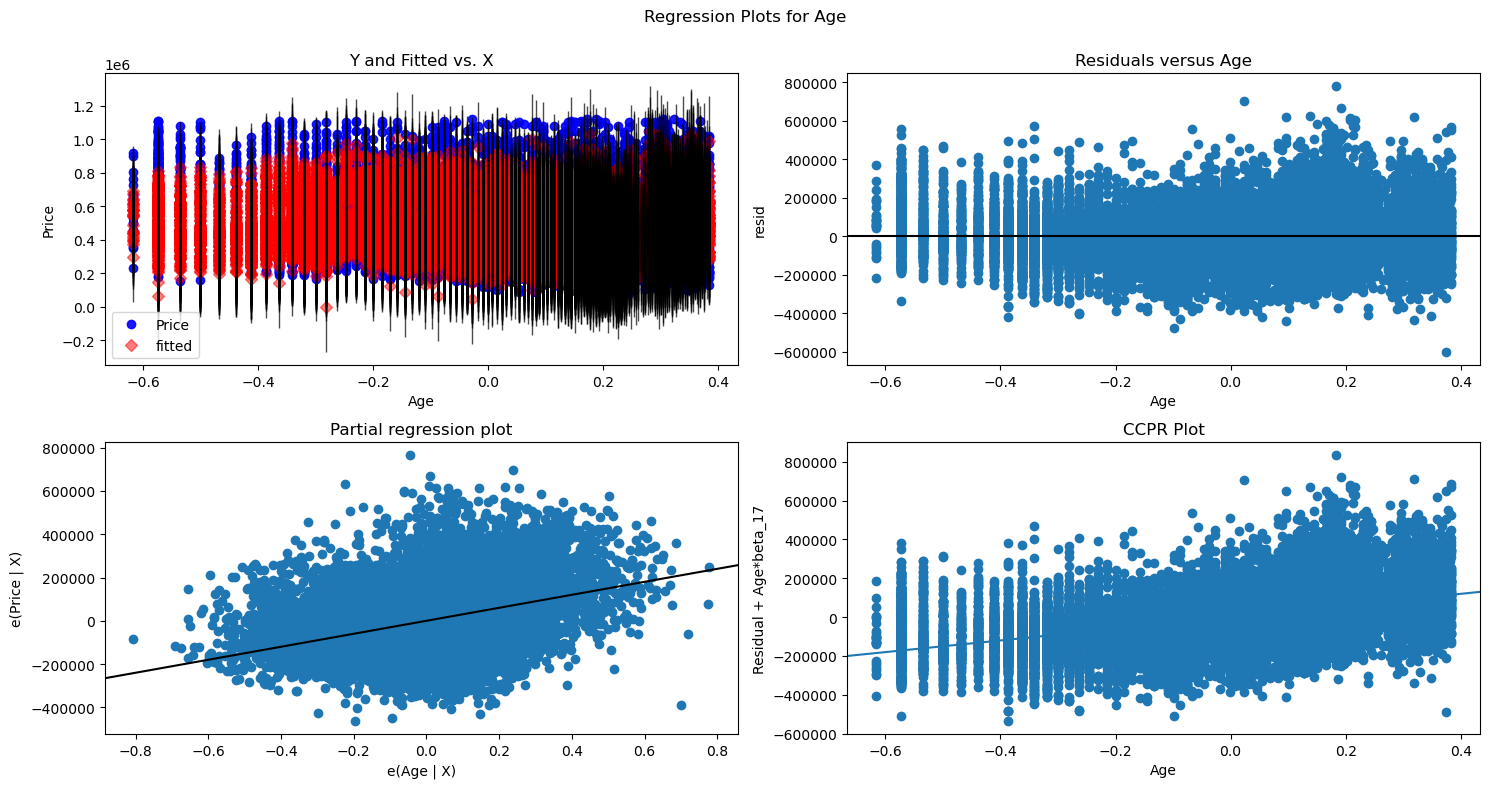

In [45]:
#Visualizing the error term for variance and skedasticity in Model 4#

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model4, "Living_area", fig=fig)
plt.savefig('Images/Var_sked_Model4_Living_area.png',dpi=300,bbox_inches='tight')

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model4, "Lot_area",fig=fig)
plt.savefig('Images/Var_sked_Model4_Lot_area.png',dpi=300,bbox_inches='tight')

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model4, "Age",fig=fig)
plt.savefig('Images/Var_sked_Model4_Age.png',dpi=300,bbox_inches='tight')

plt.show()

#### Normality check

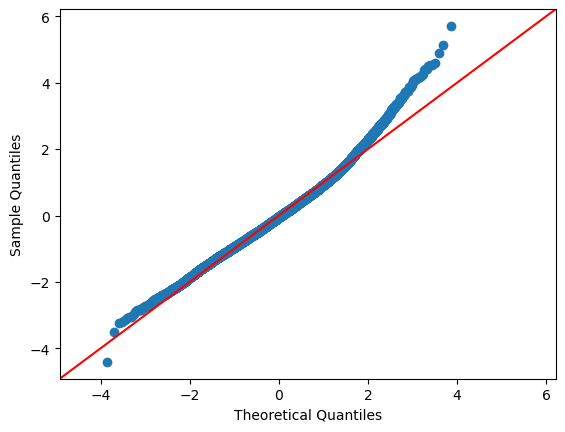

In [46]:
#Checking Normality assumption in Model 4 by Q-Q plot#

residuals4 = model4.resid
fig = sm.graphics.qqplot(residuals4, dist=stats.norm, line='45', fit=True);
plt.savefig('Images/Model4_QQ_plot.png',dpi=300,bbox_inches='tight')
plt.show()

### Observations: Models 3 and 4
<p>
    <div align ="justify">
    
1. There is no significant improvement in the Adjusted R-Squared value in either Model 3 or Model 4, however the condition number has significantly reduced, especially after feature scaling, suggesting that any multicollinearity or other errors indicated in earlier models have been eliminated. Removal of certain columns had almost the same effect as feature scaling (also see note below).
        <br>
        </br>
2. There is no significant change in the assumptions of regression from Model 2, indicating that the relationship between the independent and dependent variables appears to be reasonably robust. The skewness and kurtosis levels are within tolerated limits.
<br>
</br>
3. The coefficients for the constant and the three independent variables are all in the exact centre for the narrow ranges of each of the 95% confidence intervals. This appears to be true for the categorical variables as well. This corroborates Point 2 above.
<br>
</br>
4. The coefficients for 'Living area' and 'Age' are positive, indicating that an increase in either causes an increase in sale price, whilst the opposite is true of 'Lot area' (with a negative coefficient). 
<br>
</br>
<b>Note: I used various permutations of column removals/feature scaling and reran models each time, but was unable to find any model that improved the existing results. In fact, most of those models had a much lower Adjusted R-squared value and increased skew and kurtosis. I have not included those iterations herein. Model 4 will be the final model used in this study.
       </div>

### Step 5: Model validation
<p>
    <div align="justify">
Perform both Train-Test splits and Cross validation on the final model. Compare the R-Squared and Mean Squared Error values across the splits, and compute the accuracy of the model.
      </div>

#### Train-test split

In [47]:
#Performing train-test split#

y5=df3[['Price']]
X5=df3.drop(['Price'],axis=1)
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.2, random_state=42)
print('Sizes of the Train-Test Split:')
print('X5_Train:',len(X5_train),'X5_Test:', len(X5_test), 'y5_Train:', len(y5_train), 'y5_test:', len(y5_test))
print()

KCH = LinearRegression()
KCH.fit(X5_train,y5_train)
print ('Predicted output:')
print(KCH.predict(X5_test))
print()
print ('Accuracy of model:',KCH.score(X5_test,y5_test))

Sizes of the Train-Test Split:
X5_Train: 14162 X5_Test: 3541 y5_Train: 14162 y5_test: 3541

Predicted output:
[[590283.27291654]
 [495986.45347999]
 [480259.68945952]
 ...
 [298273.42563508]
 [485028.43100883]
 [347945.70518039]]

Accuracy of model: 0.5400669334410992


In [48]:
#Getting Mean Squared Errors using Decision Tree Regressor#

model4a=model4
model4a = DecisionTreeRegressor(random_state=42)
model4a.fit(X5_train, y5_train)

model4a_train_mse = mean_squared_error(y5_train, model4a.predict(X5_train))
model4a_test_mse = mean_squared_error(y5_test, model4a.predict(X5_test))
print('Train Mean Squared Error:', model4a_train_mse/10000000)
print('Test Mean Squared Error:', model4a_test_mse/10000000)

Train Mean Squared Error: 9.238671539564796
Test Mean Squared Error: 3233.8746297373837


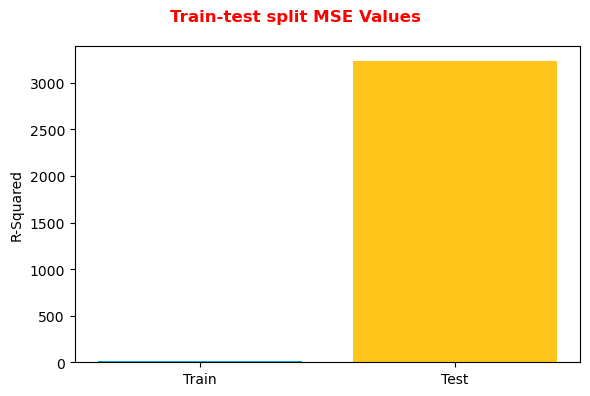

In [49]:
# Visualising MSE in train-test split#

M1=model4a_train_mse/10000000
M2=model4a_test_mse/10000000

labels = ["Train", "Test"]
colors = ["#00B3E6", "#FFC51B"]

fig, ax = plt.subplots(figsize=(6,4))
ax.bar(labels, [M1, M2], color=colors)
ax.set_ylabel("R-Squared")
fig.suptitle("Train-test split MSE Values", c="r", fontsize=12, fontweight="bold");
fig.tight_layout()
plt.savefig('Images/Train_test_MSE.png',dpi=300,bbox_inches='tight')

In [50]:
#Checking the R-squared values for train-test split#
print('R-Squared Values for train-test split:')
print()
print('Training data:',model4a.score(X5_train, y5_train))
print('Test data:',model4a.score(X5_test, y5_test))

R-Squared Values for train-test split:

Training data: 0.9977042317691207
Test data: 0.1848343874044449


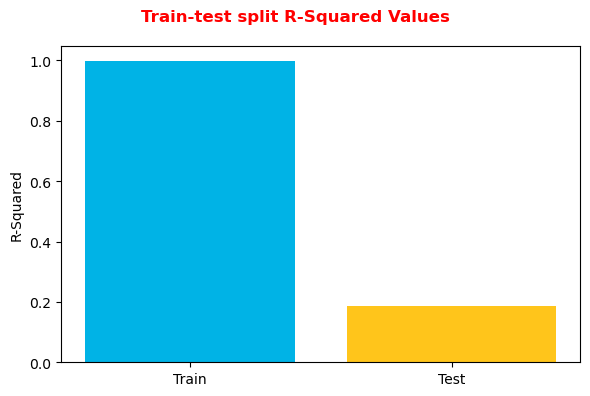

In [51]:
#Visualising R-Squared values in train-test split#

R1=model4a.score(X5_train, y5_train)
R2=model4a.score(X5_test, y5_test)

fig, ax = plt.subplots(figsize=(6,4))
ax.bar(labels, [R1, R2], color=colors)
ax.set_ylabel("R-Squared")
fig.suptitle("Train-test split R-Squared Values", c="r", fontsize=12, fontweight="bold");
fig.tight_layout()
plt.savefig('Images/Train_test_R2.png',dpi=300,bbox_inches='tight')

#### Cross validation

In [52]:
#Comparing R-Squared values for training and test data over 10 splits# 

cvr = cross_validate(KCH, X5, y5,cv=10, scoring="r2", return_train_score=True)
train1=cvr["train_score"]
test1=cvr["test_score"]

print('R-Squared Values for Training and Test data over 10 splits:')
print ()
print('Training data:', train1)
print()
print('Test data:',test1)

R-Squared Values for Training and Test data over 10 splits:

Training data: [0.53585546 0.53717347 0.53873053 0.54023256 0.53793779 0.53633112
 0.53329442 0.53848493 0.5347041  0.53938175]

Test data: [0.54501287 0.53419372 0.52044075 0.49937335 0.5265769  0.54069803
 0.56578286 0.52036141 0.55539986 0.44845725]


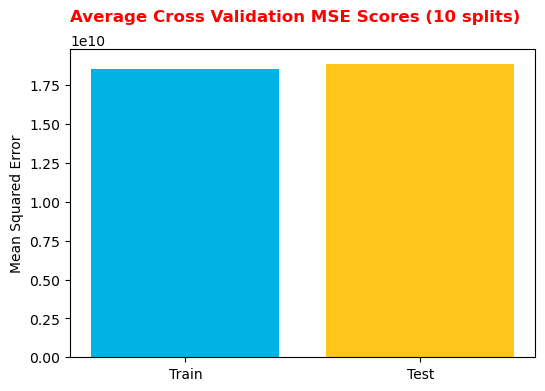

In [53]:
#Visualising cross validation MSE results#

cvr2 = cross_validate(KCH, X5, y5,cv=10, scoring="neg_mean_squared_error", return_train_score=True)
train_avg = -cvr2["train_score"].mean()
test_avg = -cvr2["test_score"].mean()

fig, ax = plt.subplots(figsize=(6,4))
ax.bar(labels, [train_avg, test_avg], color=colors)
ax.set_ylabel("Mean Squared Error")
fig.suptitle("Average Cross Validation MSE Scores (10 splits)", c="r", fontsize=12, fontweight="bold");
plt.savefig('Images/Cross_val_MSE.png',dpi=300,bbox_inches='tight')

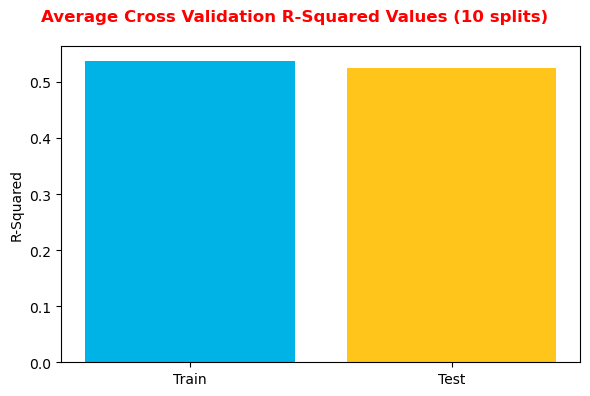

In [54]:
#Visualising cross validation average R-squared results over 10 splits#

train_avg = cvr["train_score"].mean()
test_avg = cvr["test_score"].mean()

fig, ax = plt.subplots(figsize=(6,4))
ax.bar(labels, [train_avg, test_avg], color=colors)
ax.set_ylabel("R-Squared")
fig.suptitle("Average Cross Validation R-Squared Values (10 splits)", c="r", fontsize=12, fontweight="bold");
fig.tight_layout()
plt.savefig('Images/Cross_val_R2.png',dpi=300,bbox_inches='tight')

### Conclusions
<p>
    <div align="justify">
        
1. The final model is overfitting as evidenced by the significant differences in R-Squared and Mean Squared Error values between the Train and Test datasets. Interestingly, cross-fold validation appears to show that the model is fitted correctly but that can be explained by the fact that it does not shuffle the data before splitting it into folds. This might mean that there are some aspects of the splits that are not representative of what the actual training data and test data are.
        <br>
        </br>
2. The model will predict correctly around 54% of the time, which is acceptable since it is an inference model.
<br>
</br>
3. The best indicator for a good sale price for a property appears to be the size of the living area. The age of the property might be a factor although the spread suggests that some older properties also sell at high prices. This could possibly be because the data includes heritage properties, etc. The area of the lot, and the number of bedrooms and bathrooms has an inverse relationship with sale prices. It is possible that bigger lots require more maintenance or development. Buyers might be looking for fewer bedrooms in a larger living space. It is logical to assume that the better the condition and grade of the property, the better the sale value. 
        </div>    

### Actionable insight
<p>
    <div align="justify">
        
The two main co-efficients I would choose to infer property sale prices in King County are "Living_area' and 'Lot_area'. 
        </div>